<a href="https://colab.research.google.com/github/rskamit11/ZOMATO-UNSUPERVISED-CAPESTONE-PROJECT/blob/main/ZOMATO_UNSUPERVISED_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

ZOMATO RESTAURANT CLUSTERING AND SENTIMENTAL ANALYSIS.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  AMIT S KASHYAP
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

ndia is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/rskamit11/ZOMATO-UNSUPERVISED-CAPESTONE-PROJECT/tree/main

# **Problem Statement**


**Write Problem Statement Here.**

e Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing shap for model explainability
!pip install shap
import shap

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.6 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Dataset Loading

In [4]:
# Load Dataset

In [5]:
meta_df = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')

In [6]:
review_df =pd.read_csv('/content/Zomato Restaurant reviews.csv')

### Dataset First View

In [7]:
# Dataset First Look

In [8]:
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [9]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count

In [11]:
meta_df.shape

(105, 6)

In [12]:
review_df.shape

(10000, 7)

### Dataset Information

In [13]:
meta_df.info()
print('='*120)
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count

In [15]:
meta_df.duplicated().value_counts()


False    105
dtype: int64

In [16]:
review_df.duplicated().value_counts()

False    9964
True       36
dtype: int64

In [17]:
#getting duplicate values
print(f' Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]


 Duplicate data count = 36


Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [18]:
#checking values for Anerican Wild Things
review_df[(review_df['Restaurant'] == 'American Wild Wings')].shape


(100, 7)

In [19]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant'] == 'Arena Eleven')].shape


(100, 7)

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count for hotel data
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [21]:
# Missing Values/Null Values Count for review data
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [22]:
# Visualizing the missing values

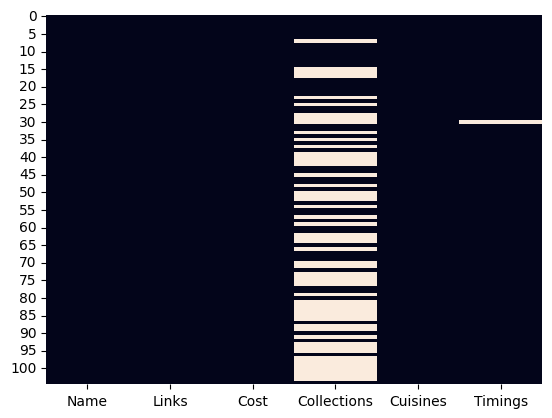

In [23]:
sns.heatmap(meta_df.isnull(), cbar=False);

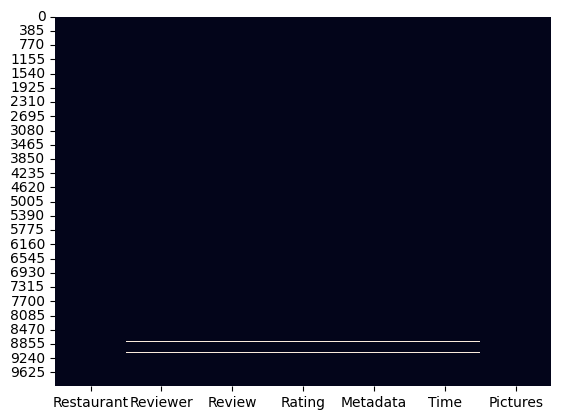

In [24]:
sns.heatmap(review_df.isnull(), cbar=False);

### What did you know about your dataset?

Answer Here
META DATA :-
There are 105 total observation with 6 different features.
Feature like collection and timing has null values.
There is no duplicate values i.e., 105 unique data.
Feature cost represent amount but has object data type because these values are separated by comma ','.
Timing represent operational hour but as it is represented in the form of text has object data type.

REVIEW DATA :-
There are total 10000 observation and 7 features.
Except picture and restaurant feature all others have null values.
There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
Rating represent ordinal data, has object data type should be integer.
Timing represent the time when review was posted but show object data time, it should be converted into date time.

## ***2. Understanding Your Variables***

In [25]:
# Dataset Columns
meta_df.columns.to_list()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [26]:
review_df.columns.to_list()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [27]:
# Dataset Describe
meta_df.describe().T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [28]:
review_df.describe(include='all').T

count unique              top  freq mean  std  min  25%  50%  \
Restaurant    10000    100  Beyond Flavours   100  NaN  NaN  NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13  NaN  NaN  NaN  NaN  NaN   
Review         9955   9364             good   237  NaN  NaN  NaN  NaN  NaN   
Rating         9962     10                5  3832  NaN  NaN  NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919  NaN  NaN  NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3  NaN  NaN  NaN  NaN  NaN   
Pictures   10000.00    NaN              NaN   NaN 0.75 2.57 0.00 0.00 0.00   

            75%   max  
Restaurant  NaN   NaN  
Reviewer    NaN   NaN  
Review      NaN   NaN  
Rating      NaN   NaN  
Metadata    NaN   NaN  
Time        NaN   NaN  
Pictures   0.00 64.00

### Variables Description

Answer Here

Zomato Restaurant names and Metadata

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

Zomato Restaurant reviews

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

Zomato Restaurant Reviews

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.

In [30]:
for i in meta_df.columns.tolist():
  print("No. of unique values in ",i,"is",meta_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [31]:
for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Write your code to make your dataset analysis ready.
#creating copy of both the data
meta = meta_df.copy()
review = review_df.copy()


In [33]:
#before changing data type for cost checking values
meta['Cost'].unique()


array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [34]:
# changing the data type of the cost function
meta['Cost'] = meta['Cost'].str.replace(",","").astype('int64')

In [35]:
#top 5 costlier restaurant
meta.sort_values('Cost', ascending = False)[['Name','Cost']][:5]


Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [36]:
#top 5 economy restaurant
meta.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

Name  Cost
85         Momos Delight   200
29    Hunger Maggi Point   200
101         Sweet Basket   200
89   Mohammedia Shawarma   150
23                  Amul   150

In [37]:
#hotels that share same price
meta_dict = {}
amount = meta.Cost.values.tolist()

#adding meta name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = meta[meta['Cost'] == price]
    meta_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_meta_df=pd.DataFrame.from_dict([meta_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = meta.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_meta_df = same_price_meta_df.merge(hotel_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_meta_df.sort_values('Total_Restaurant', ascending = False)[:5]

Cost                                Name of Restaurants  Total_Restaurant
4    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
17   600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
20   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
2   1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
8    400  [Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...                 6

In [38]:
#hotels which has max price
same_price_meta_df.sort_values('Cost', ascending = False)[:5]


Cost                                Name of Restaurants  Total_Restaurant
26  2800             [Collage - Hyatt Hyderabad Gachibowli]                 1
22  2500                 [Feast - Sheraton Hyderabad Hotel]                 1
12  1900  [10 Downing Street, Jonathan's Kitchen - Holid...                 2
25  1800          [Cascade - Radisson Hyderabad Hitec City]                 1
27  1750                  [Zega - Sheraton Hyderabad Hotel]                 1

In [39]:
# spliting the cusines and storing in list
cuisine_value_list = meta.Cuisines.str.split(', ')

In [40]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [41]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [42]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]


Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15

In [43]:
# spliting the cusines and storing in list
Collections_value_list = meta.Collections.dropna().str.split(', ')

In [44]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1


In [45]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})


In [46]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]


Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

In [47]:
# REVIEWS DATA

In [48]:
#in order to change data type for rating checking values
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [49]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [50]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [51]:
#changing date and extracting few feature for manipulation

review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour


In [52]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                                     4.00    4.00             1
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[101 rows x 3 columns]

In [53]:
#usless data
review[review['Restaurant'] == 4.0]


Restaurant Reviewer Review  Rating Metadata  \
7601       4.00     4.00   4.00    4.00     4.00   

                              Time  Pictures  Reviewer_Total_Review  \
7601 1970-01-01 00:00:00.000000004         4                    NaN   

      Reviewer_Followers  Review_Year  Review_Month  Review_Hour  
7601                 NaN      1970.00          1.00         0.00

In [54]:
#checking hotel count as total hotel in restaurant data was 105
review.Restaurant.nunique()


101

In [55]:
#finding hotel without review
hotel_without_review = [name for name in meta.Name.unique().tolist()
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [56]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]


Restaurant  Rating  Total_Review
4        AB's - Absolute Barbecues    4.88           100
12                          B-Dubs    4.81           100
3   3B's - Buddies, Bar & Barbecue    4.76           100
68                        Paradise    4.70           100
36                        Flechazo    4.66           100

In [57]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]


Restaurant  Rating  Total_Review
42  Hotel Zara Hi-Fi    2.40           100
11    Asian Meal Box    2.58           100
67     Pakwaan Grand    2.71           100
58     Mathura Vilas    2.82           100
15   Behrouz Biryani    2.83           100

In [58]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5464    Satwinder Singh                 186.00            13410.00   
1702         Eat_vth_me                  60.00            13320.00   
5236       Samar Sardar                   8.00            11329.00   
1788  Foodies Hyderabad                  31.00             9494.00   
6230           Srinivas                  34.00             7628.00   

      Average_Rating_Given  
5464                  3.67  
1702                  5.00  
5236                  3.50  
1788                  4.50  
6230                  3.71

In [59]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

Review_Year                                         Restaurant  Count
0      1970.00                                              [4.0]      1
1      2016.00  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
2      2017.00  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
3      2018.00  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
4      2019.00  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [60]:
#merging both data frame
meta = meta.rename(columns = {'Name':'Restaurant'})
merged = meta.merge(review, on = 'Restaurant')
merged.shape

(9999, 17)

In [61]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [62]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]


Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88      1500.00
11                          B-Dubs    4.81      1600.00
2   3B's - Buddies, Bar & Barbecue    4.76      1100.00
67                        Paradise    4.70       800.00
35                        Flechazo    4.66      1300.00

In [63]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]


Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi    2.40       400.00
10    Asian Meal Box    2.58       200.00
66     Pakwaan Grand    2.71       400.00
57     Mathura Vilas    2.82       500.00
14   Behrouz Biryani    2.83       600.00

In [64]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

Rating_Count
Reviewer                  
Parijat Ray             13
Ankita                  13
Kiran                   12
Vedant Killa            11
Jay Mehta               11

### What all manipulations have you done and insights you found?

Answer Here.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [65]:
# Chart - 1 visualization code

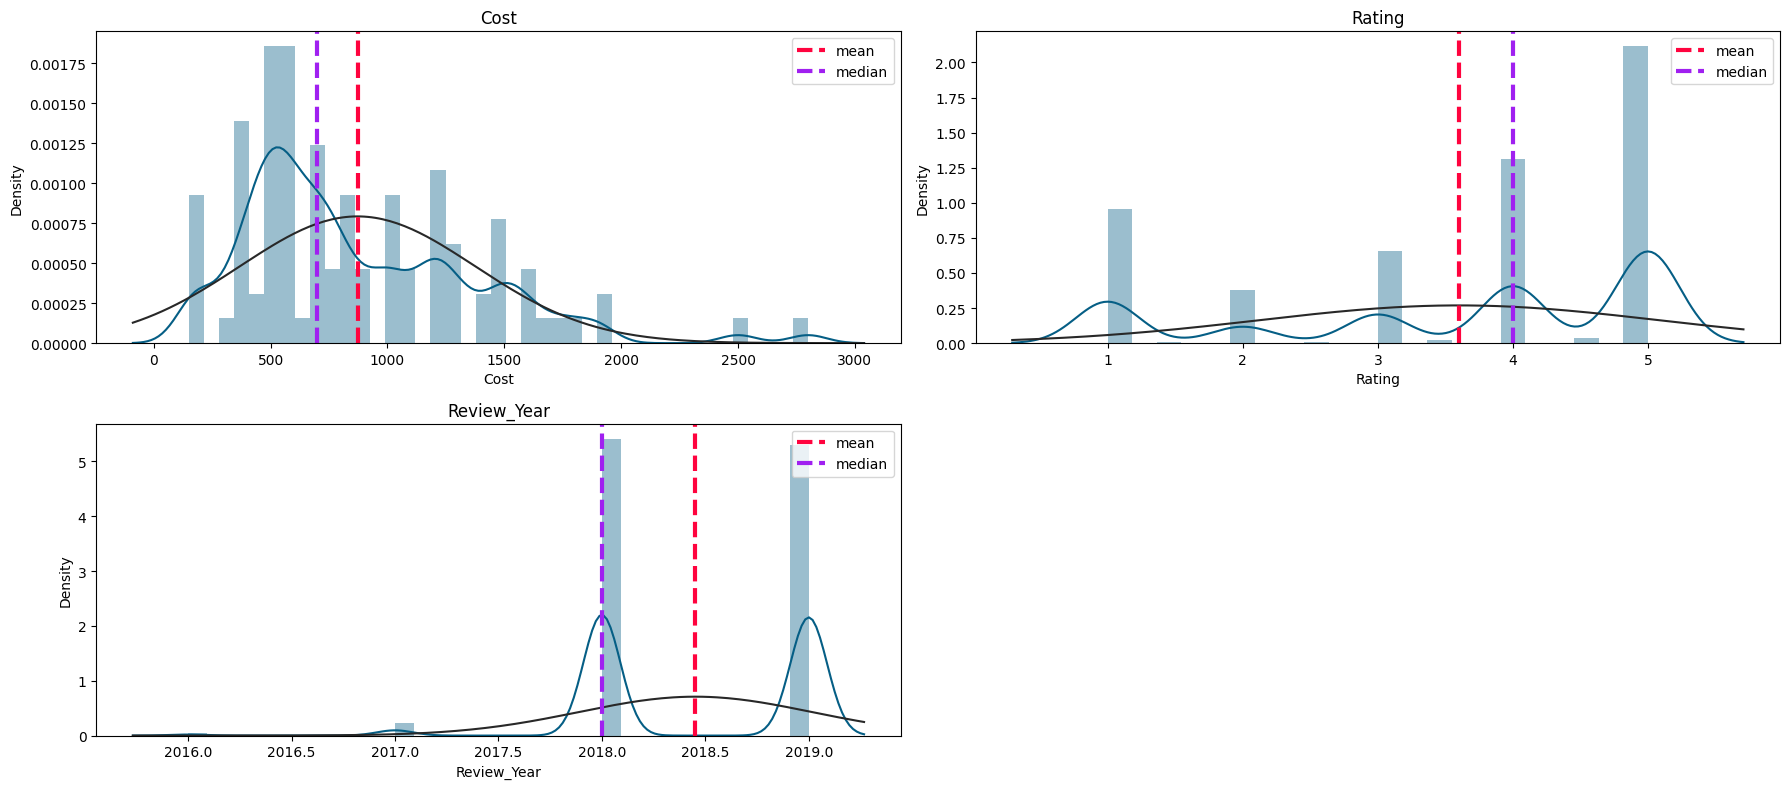

In [66]:
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Answer Here.

Displot for distribution

##### 2. What is/are the insight(s) found from the chart?

Answer Here

All three are show skewness.
Maximum restaurant show price range for 500.
In 2018 number of reviews are more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Price always place important role in any business alongwith rating which show how much engagement are made for the product.

#### Chart - 2

In [67]:
# Chart - 2 visualization code

In [68]:
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

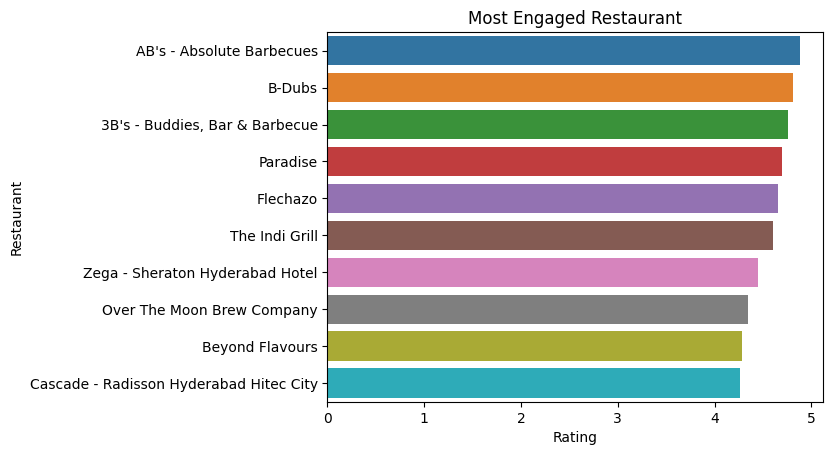

In [69]:
sns.barplot(data =most_engaged_hotel [:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.  

Price Point and Maximum Engagement

##### 2. What is/are the insight(s) found from the chart?

Answer Here

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

#### Chart - 3

In [70]:
# Chart - 3 visualization code

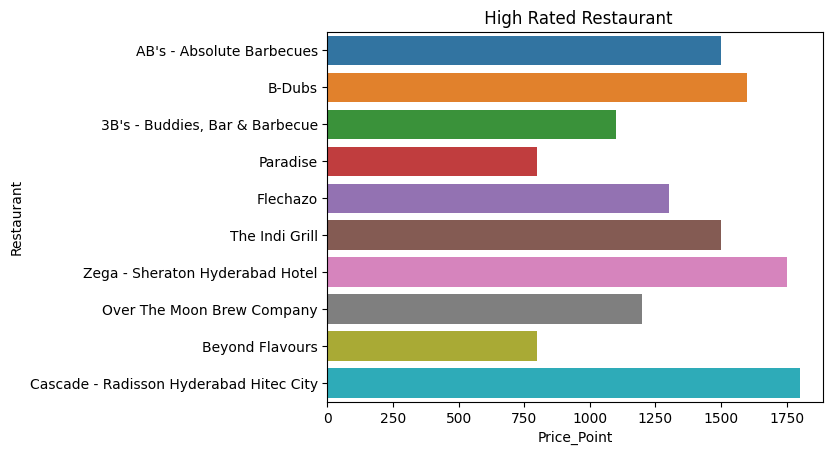

In [71]:
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title(' High Rated Restaurant')
plt.show()

Text(0.5, 1.0, 'Low Rated Restaurant')

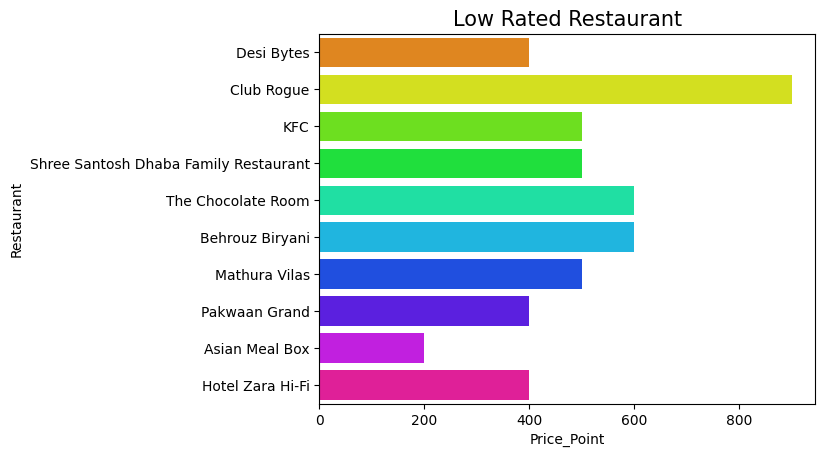

In [72]:
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point',
            y = 'Restaurant',palette = 'hsv')
plt.title('Low Rated Restaurant', size = 15)

##### 1. Why did you pick the specific chart?

Answer Here.

Price Point for High Rated and Low Rated Hotels

Value counts of collection

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.

Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.

#### Chart - 4

In [73]:
# Chart - 4 visualization code

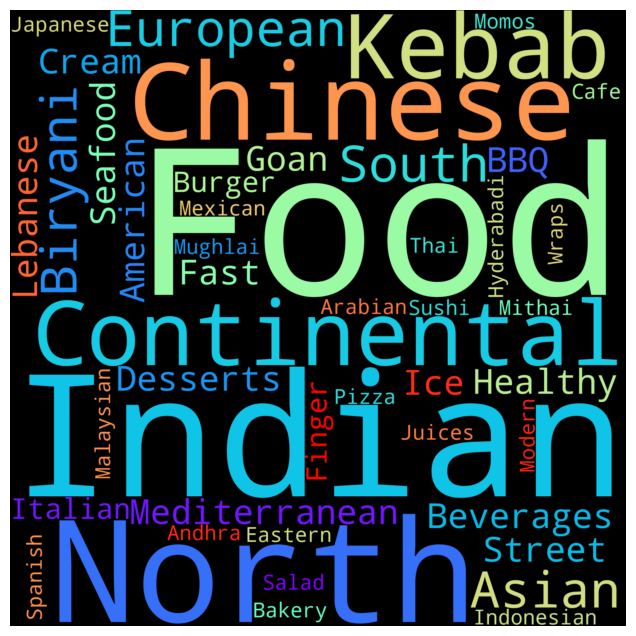

In [74]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");


##### 1. Why did you pick the specific chart?

Answer Here.

Word cloud for cuisine.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.

This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers.

#### Chart - 5

In [75]:
# Chart - 5 visualization code

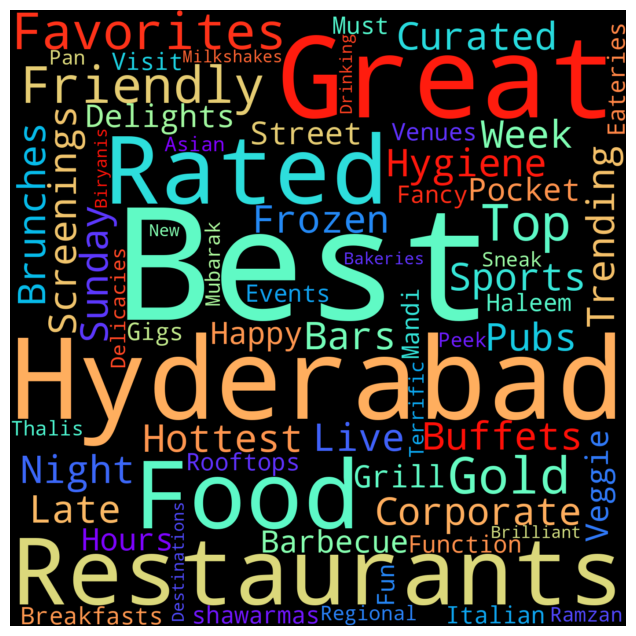

In [76]:
# storing all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False,
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

Answer Here.

A word cloud displays the most frequently mentioned attributes in a way that is visually striking and easy to understand. It is useful for identifying the most frequently mentioned attributes and can be used to quickly identify patterns and trends in customer reviews.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

A word cloud of tags used to describe food can help Zomato identify the most frequently mentioned food attributes in customer reviews. This can provide insight into which attributes are most popular and well-regarded among customers, and which attributes may need improvement.

#### Chart - 6

In [77]:
# Chart - 6 visualization code

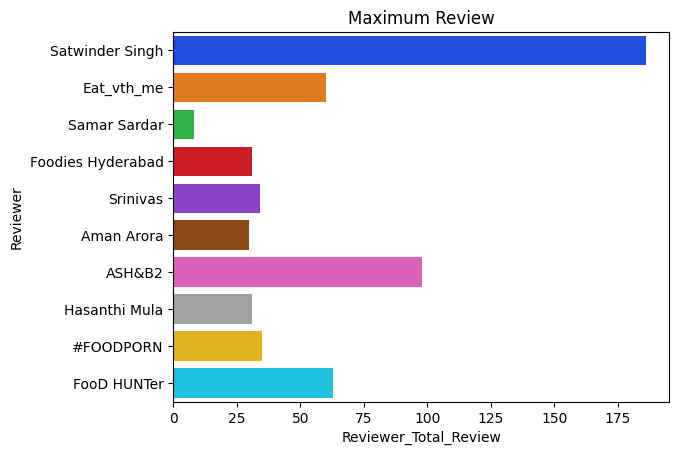

In [78]:
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Maximum Review')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Most review by Reviewer.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Satwinder singh is the most popular critic who has maximum number of follower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

#### Chart - 7

In [79]:
# Chart - 7 visualization code

In [80]:
price_of_hotel = meta.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

In [81]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(meta[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']


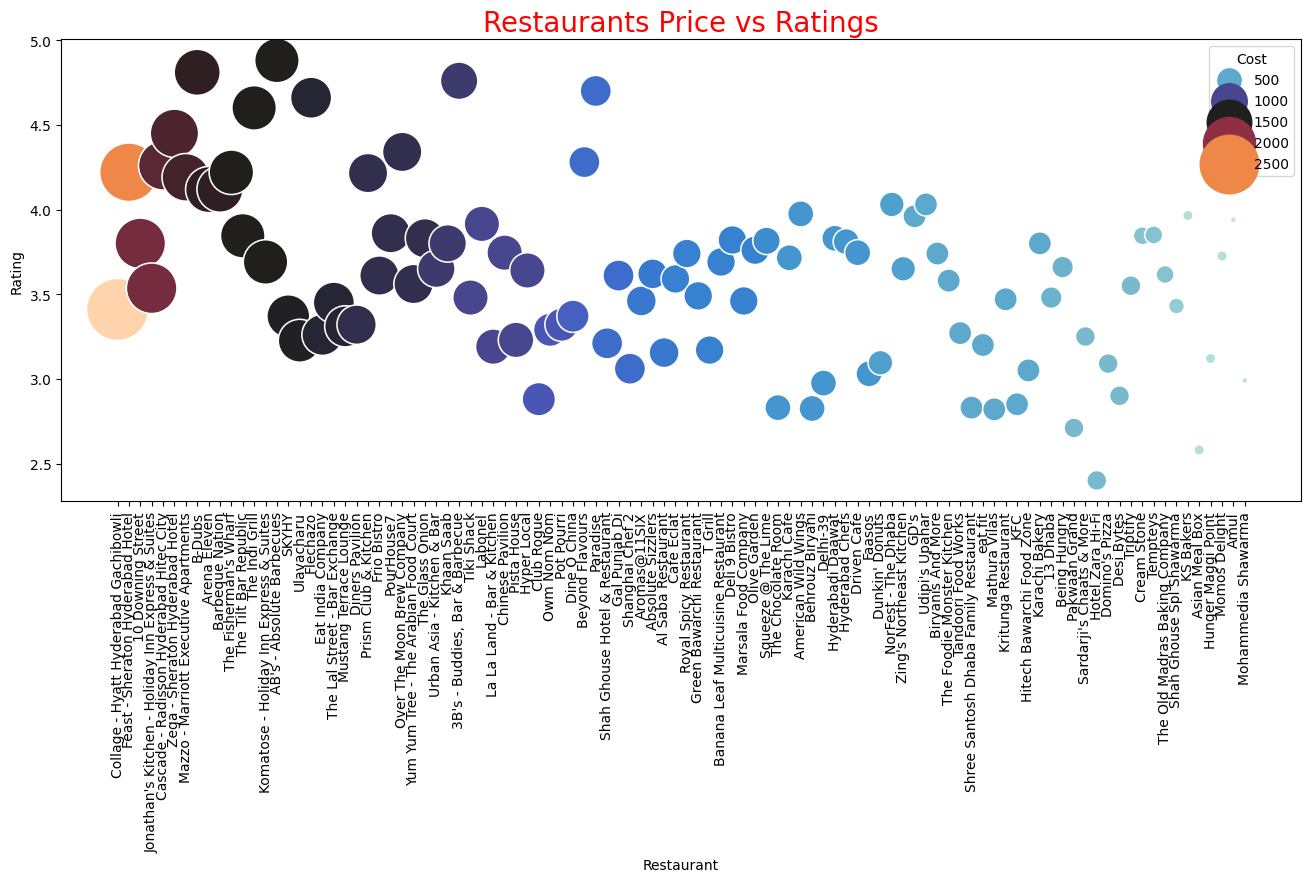

In [82]:
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost",
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants Price vs Ratings',size=20,color = 'red')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Restaurant on the basis of price and ratings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Based on the average rating of 3.4 these product should increase their engagement as this may cause negative brand impact. However true behaviour can only be inspected through analysing of reviews.

#### Chart - 8

In [83]:
# Chart - 8 visualization code

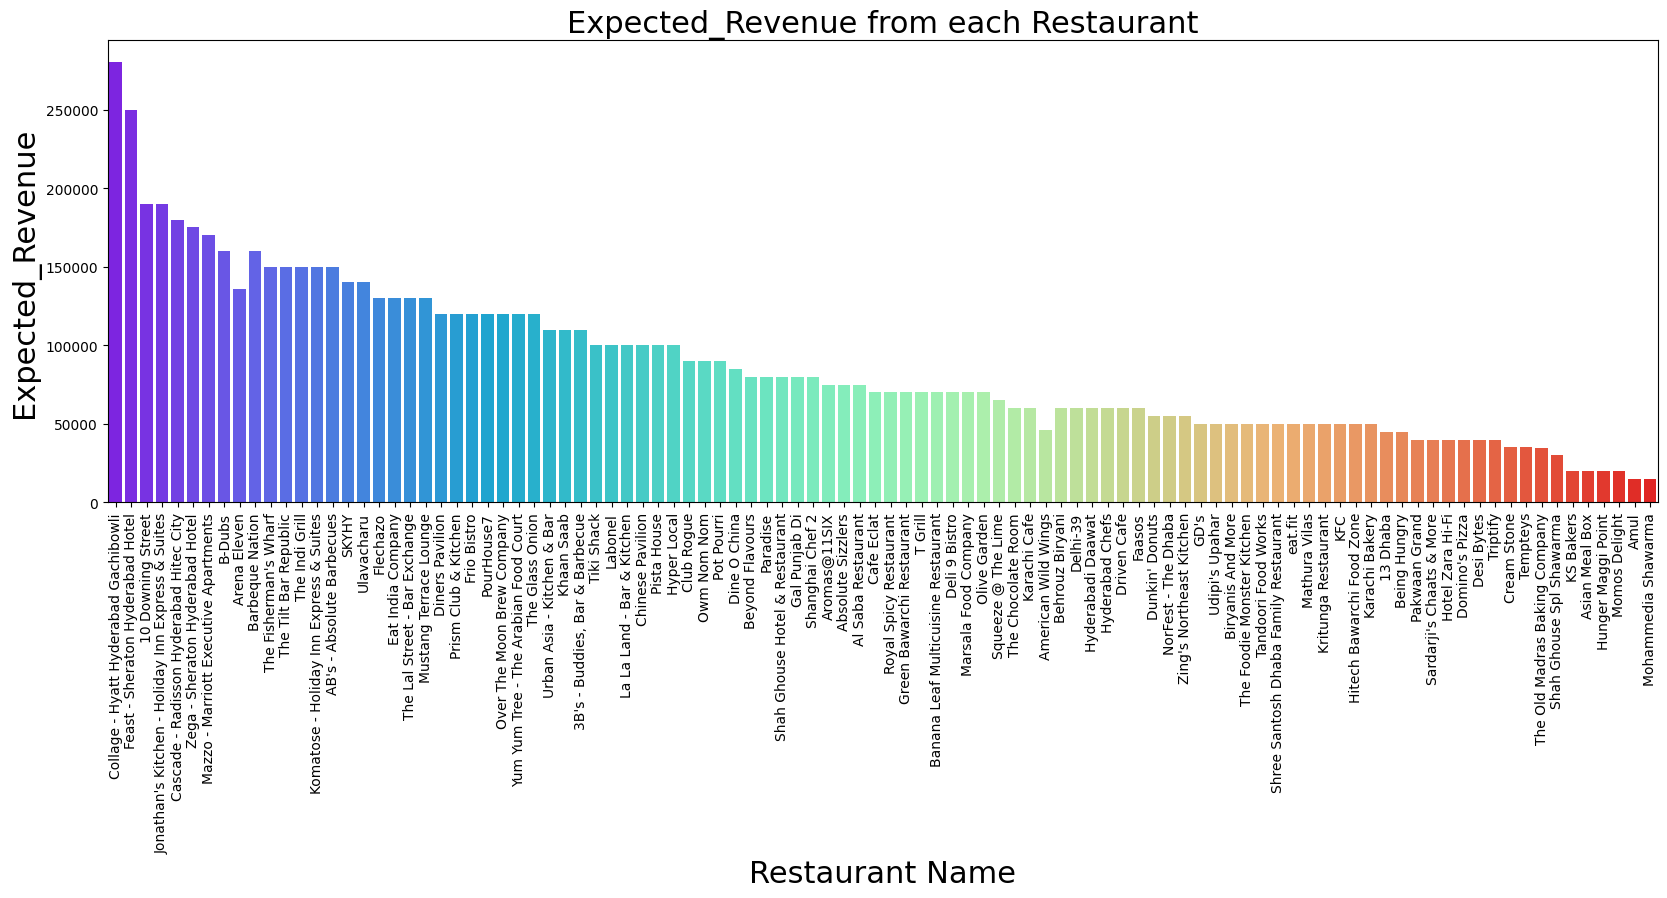

In [84]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To understand expected revenue.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market.

#### Chart - 9

In [85]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

Word cloud for positive reviews.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Service, taste, time, starters are key to good review.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

These gives an perespective of customers about a services and meals, which helps to desirable changes accordingly And ultimately it gives an positive results.

#### Chart - 10

In [86]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

Negative reviews wordcloud.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Service , bad chicken , staff behavior, stale food are key reasons for neagtive reviews

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we discussed in above about positive impact this will also an provide us important information about what the customers views about restaurant.

#### Chart - 11

In [87]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [88]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [89]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [90]:
# Correlation Heatmap visualization code

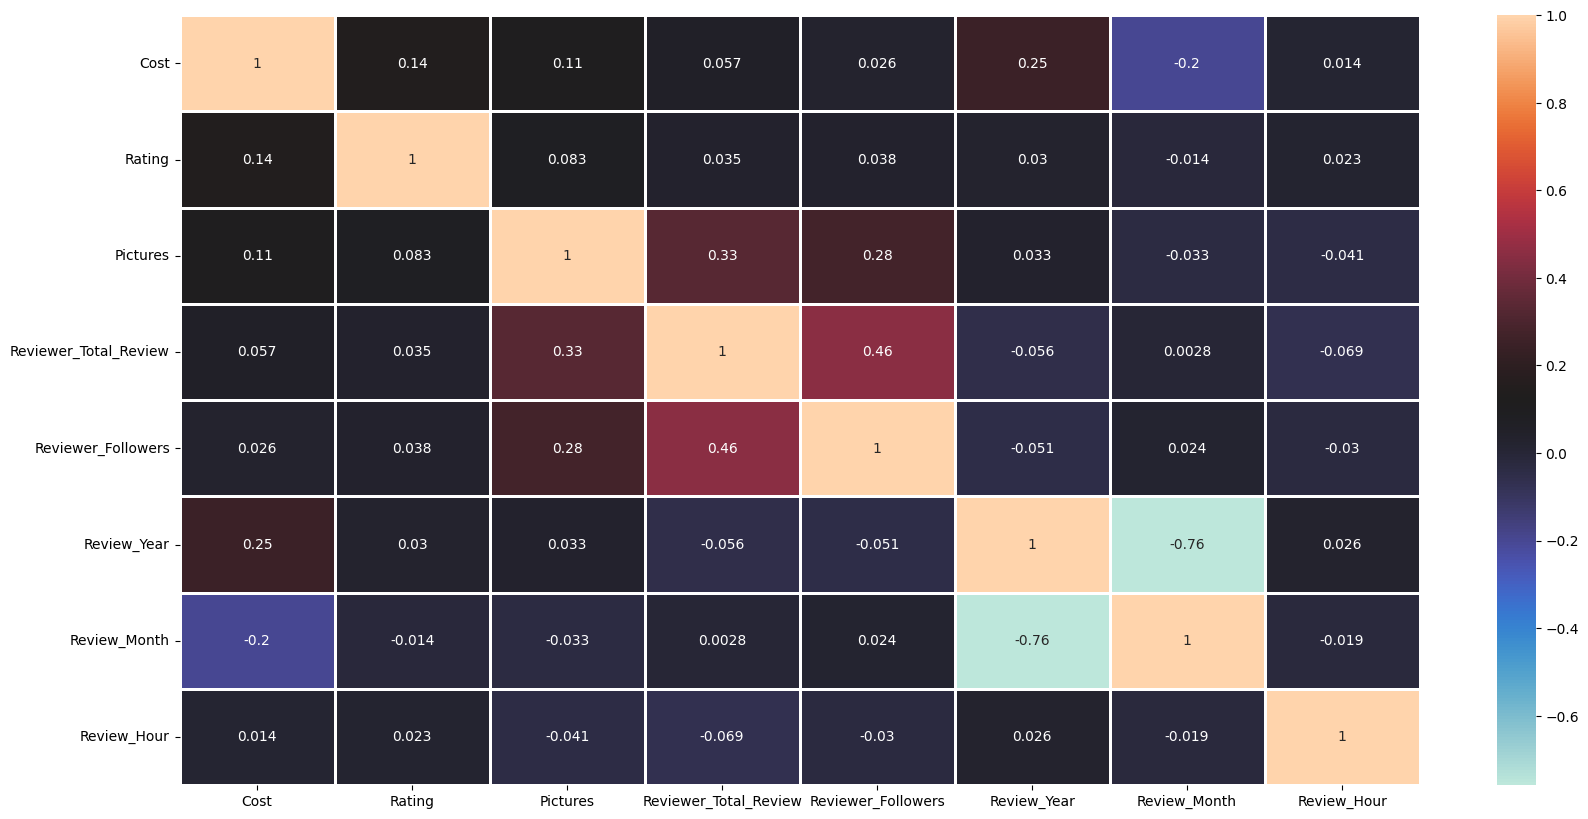

In [91]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

 A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

##### 2. What is/are the insight(s) found from the chart?

Answer Here

 It can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

#### Chart - 15 - Pair Plot

In [92]:
# Pair Plot visualization code

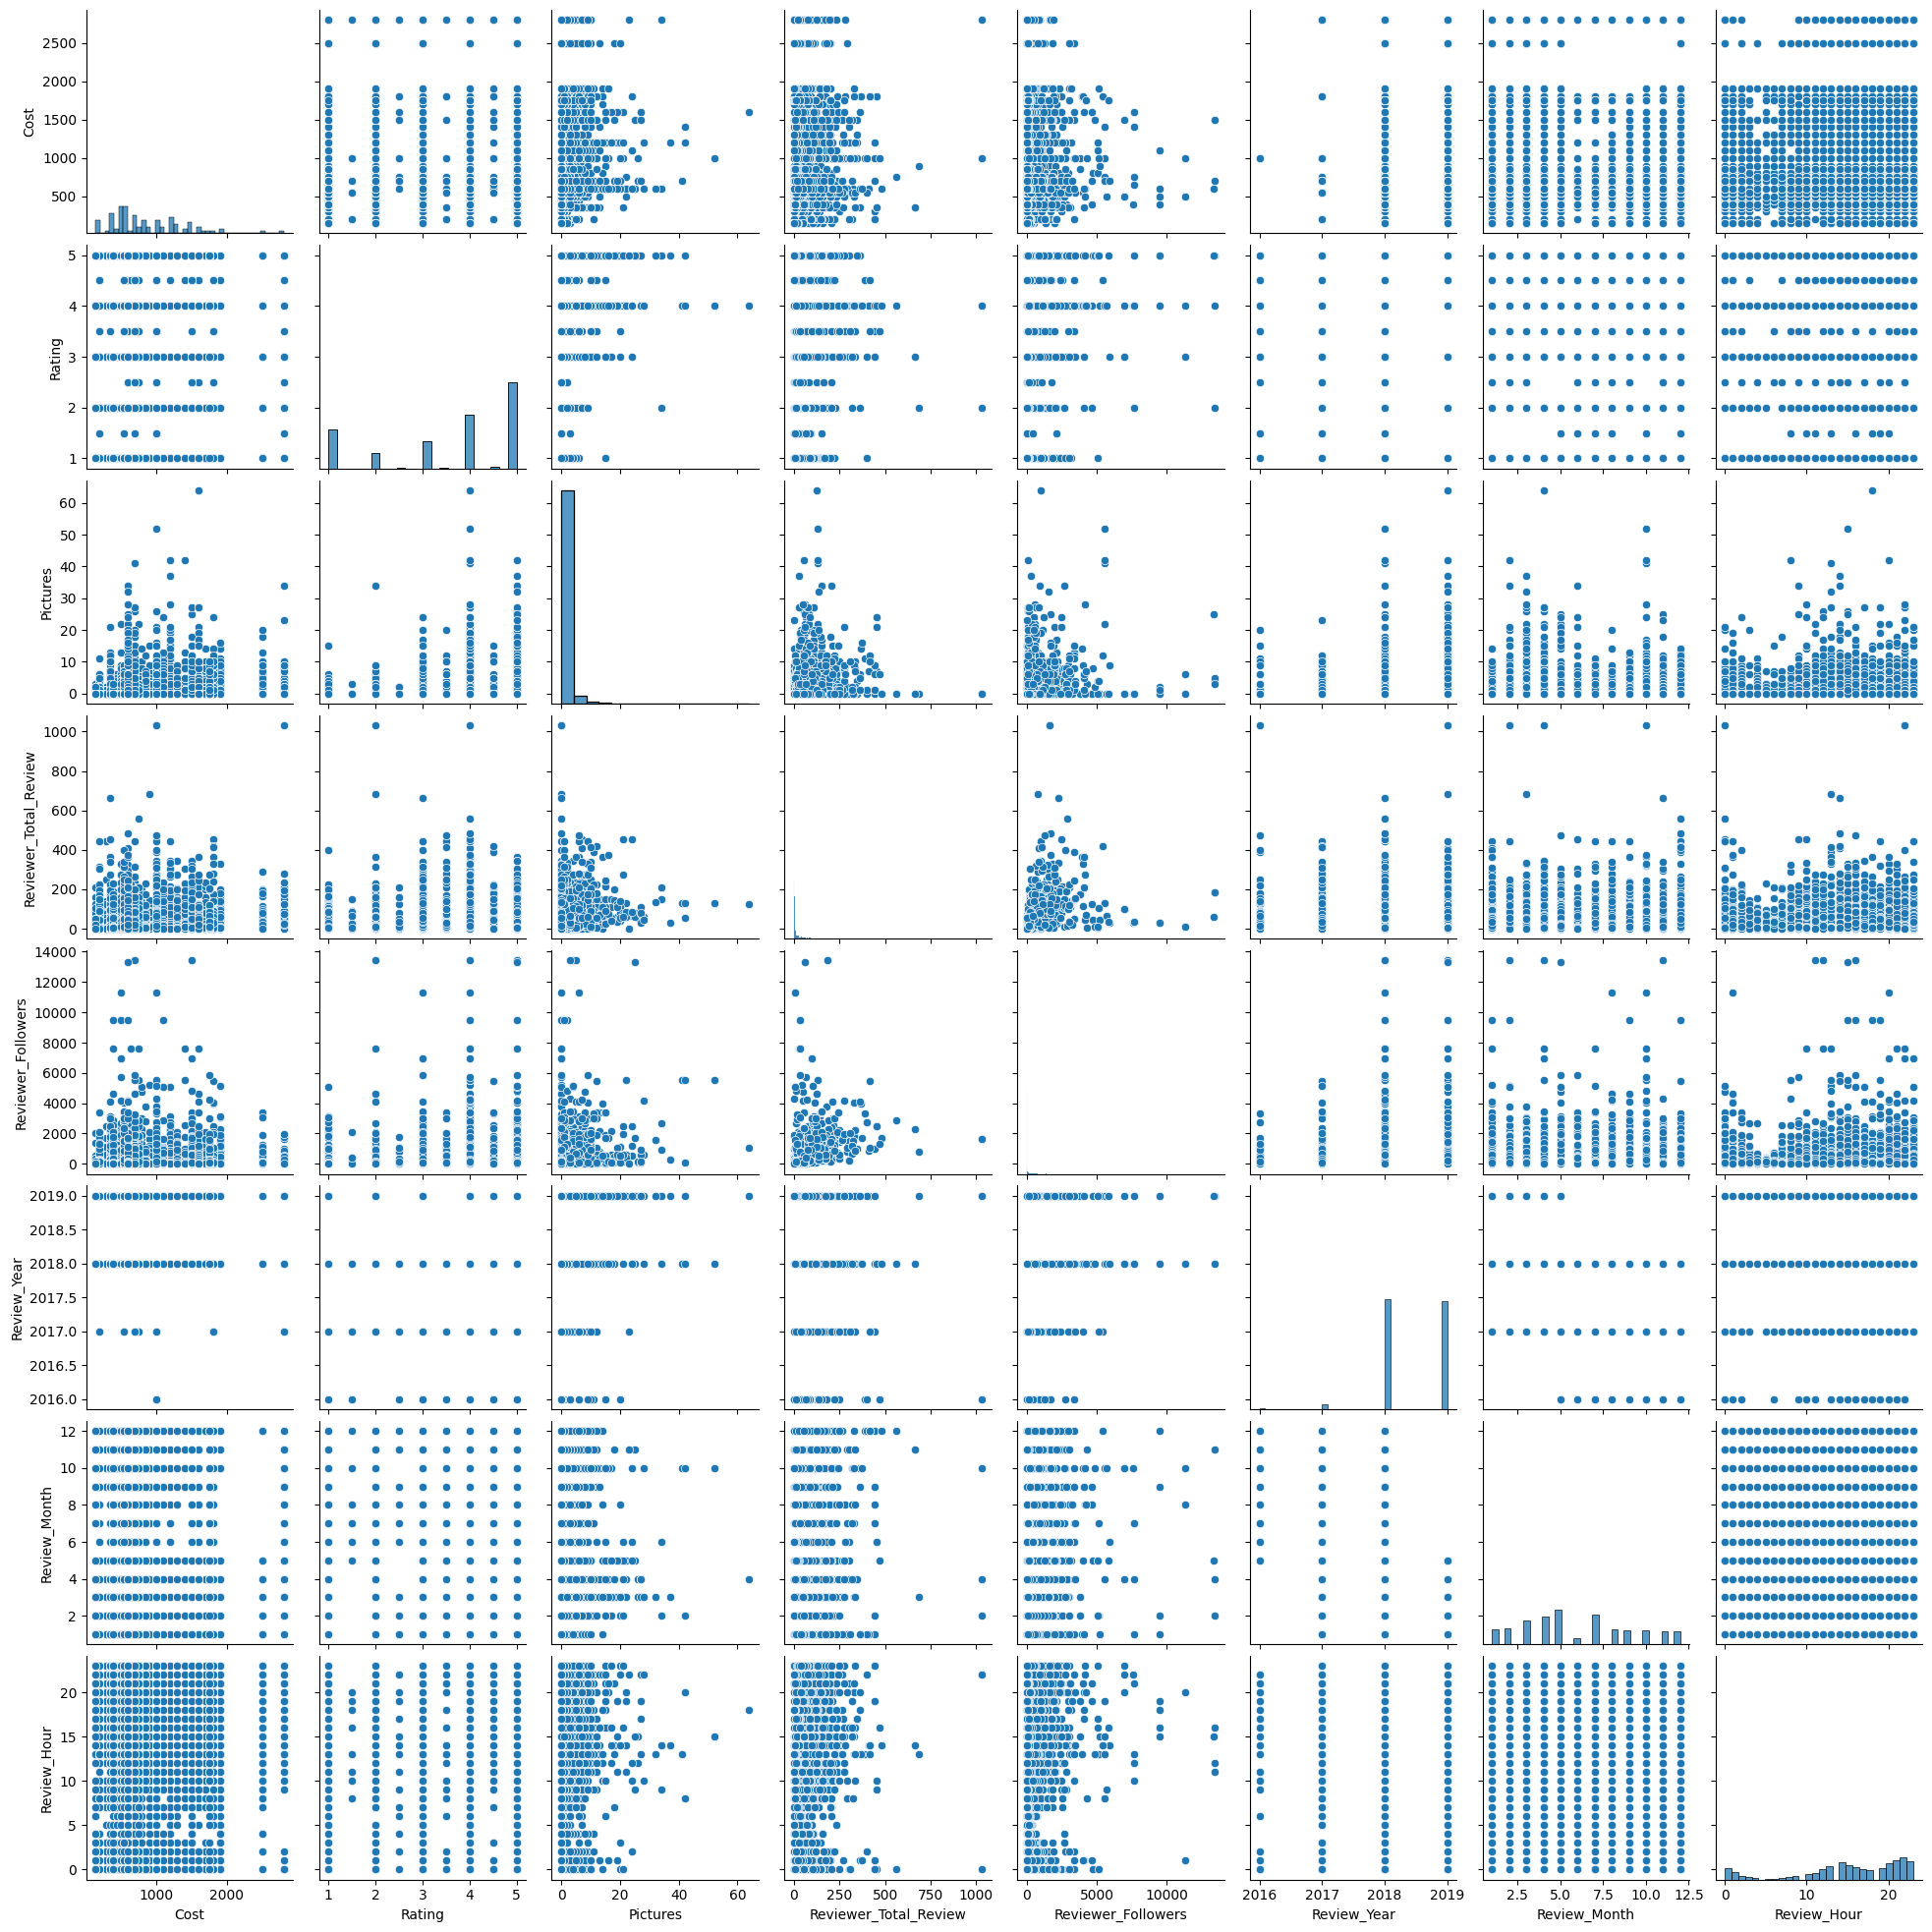

In [93]:
sns.pairplot(merged);

##### 1. Why did you pick the specific chart?

Answer Here.

I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [94]:
# Perform Statistical Test to obtain P-Value

In [95]:

import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

Answer Here.

The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 2. Perform an appropriate statistical test.

In [96]:
# Perform Statistical Test to obtain P-Value

In [97]:

# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Answer Here.

 I have used Simple Linear Regression Test.

##### Why did you choose the specific statistical test?

Answer Here.

It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [98]:
# Perform Statistical Test to obtain P-Value

In [99]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating    1.00  1.50  2.00  2.50  3.00  3.50  4.00  4.50  5.00
Cuisines                                                      
American     1     0     1     0     2     0     8     0    88

In [100]:

from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Answer Here.

I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

Answer Here.

This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [101]:
# Handling Missing Values & Missing Value Imputation

In [102]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [103]:
# RESTAURANT DATA
meta.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [104]:
#checking the null value in timing
meta[meta['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [105]:
#filling null value in timings column
meta.Timings.fillna(meta.Timings.mode()[0], inplace = True)

In [106]:
#checking null values in Collections
missing_percentage = ((meta['Collections'].isnull().sum())/(len(meta['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')


Percentage of missing value in Collections is 51.43%


In [107]:
#dropping collection column since has more than 50% of null values
meta.drop('Collections', axis = 1, inplace = True)


In [108]:
meta.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [109]:
# REVIEW DATA
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [110]:
review[review['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     NaN      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     NaN      NaN  NaT         0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
8777                    NaN                 NaN          NaN           NaN   
9085                    NaN                 NaN          NaN           NaN   

      Review_Hour  
8777          NaN  
9085          NaN

In [111]:
review[review['Reviewer_Total_Review'].isnull()]

Restaurant Reviewer Review  Rating Metadata  \
7601                 4.00     4.00   4.00    4.00     4.00   
8777  American Wild Wings      NaN    NaN     NaN      NaN   
9085         Arena Eleven      NaN    NaN     NaN      NaN   

                              Time  Pictures  Reviewer_Total_Review  \
7601 1970-01-01 00:00:00.000000004         4                    NaN   
8777                           NaT         0                    NaN   
9085                           NaT         0                    NaN   

      Reviewer_Followers  Review_Year  Review_Month  Review_Hour  
7601                 NaN      1970.00          1.00         0.00  
8777                 NaN          NaN           NaN          NaN  
9085                 NaN          NaN           NaN          NaN

In [112]:
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [113]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [114]:
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})


In [115]:
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [116]:
#merging both dataset
merged = meta.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [117]:
# Handling Outliers & Outlier treatments

In [118]:
#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())


Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


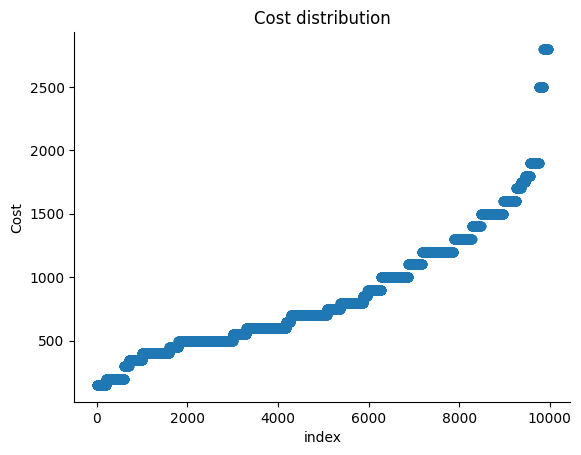

In [119]:
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


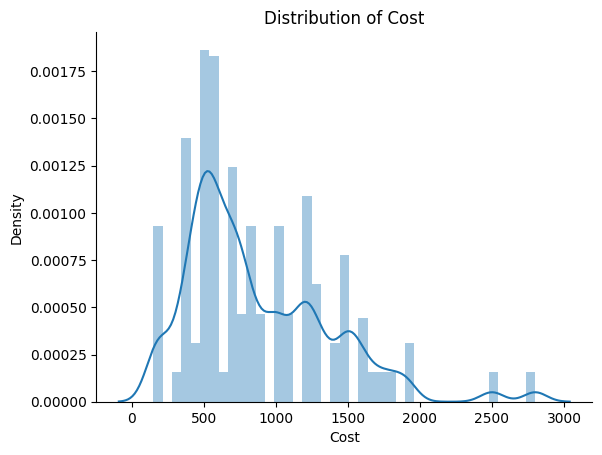

In [120]:
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

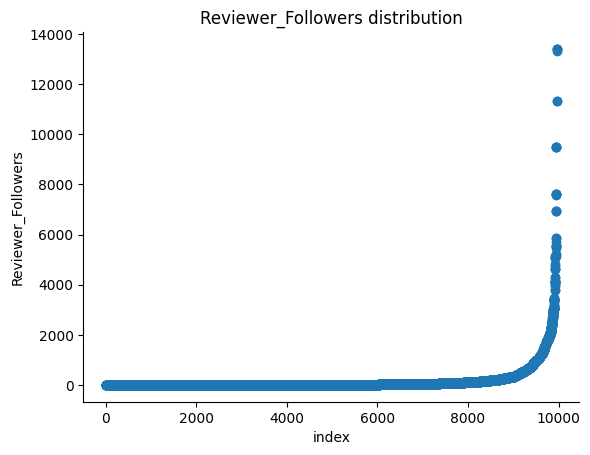

In [121]:
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

In [122]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))


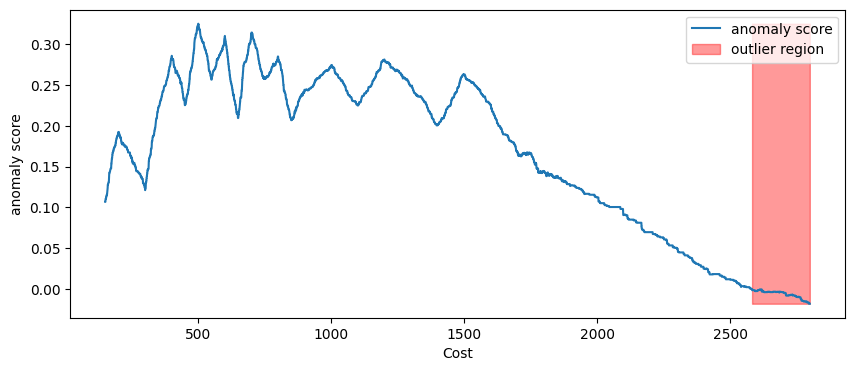

In [123]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [124]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


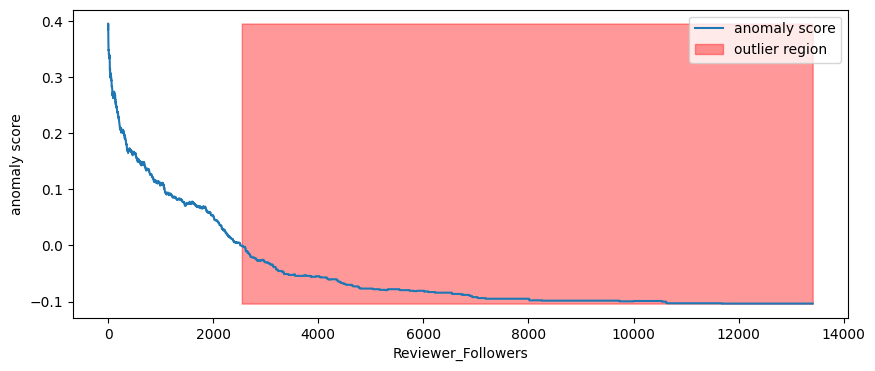

In [125]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

In [126]:
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [127]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge


In [128]:
# Restricting the data to lower and upper boundary for cost in restaurant dataset
#lower limit capping
meta.loc[meta['Cost']<= outlier_treatment_skew(df=meta,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=meta,feature='Cost')[1]

#upper limit capping
meta.loc[meta['Cost']>= outlier_treatment_skew(df=meta,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=meta,feature='Cost')[0]



In [129]:
#Restricting the data to lower and upper boundary for cost in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [130]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

### 3. Categorical Encoding

In [131]:
# Encode your categorical columns

In [132]:
#new df with important categories
cluster_dummy = meta[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

In [133]:
#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]


0         Cuisines_Chinese
0     Cuisines_Continental
0           Cuisines_Kebab
0        Cuisines_European
0    Cuisines_South Indian
0    Cuisines_North Indian
dtype: object

In [134]:
#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()


In [135]:
#total cuisine count
meta['Total_Cuisine_Count'] = meta['Cuisines'].apply(lambda x : len(x.split(',')))


In [136]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
meta = meta.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
meta.head(1)

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Total_Cuisine_Count  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   

   Average_Rating  
0            4.28

In [137]:
#adding cost column to the new dataset
cluster_dummy = meta[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [138]:
cluster_dummy.shape

(100, 48)

In [139]:
#creating data frame for categorial encoding
cluster_df = meta[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]


In [140]:
#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])


In [141]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [142]:
cluster_df.head(2).T

0  \
Restaurant                                             Beyond Flavours   
Cuisines             Chinese, Continental, Kebab, European, South I...   
Cost                                                            800.00   
Average_Rating                                                    4.28   
Total_Cuisine_Count                                               6.00   
Chinese                                                              1   
Continental                                                          1   
Kebab                                                                1   
European                                                             1   
South Indian                                                         1   
North Indian                                                         1   
Biryani                                                              0   
Asian                                                                0   
Mediterranean                                                        0   
Desserts                                                             0   
Seafood                                                              0   
Beverages                                                            0   
Goan                                                                 0   
Healthy Food                                                         0   
Lebanese                                                             0   
American                                                             0   
Ice Cream                                                            0   
Street Food                                                          0   
Fast Food                                                            0   
BBQ                                                                  0   
Italian                                                              0   
Finger Food                                                          0   
Burger                                                               0   
Japanese                                                             0   
Salad                                                                0   
Sushi                                                                0   
Mexican                                                              0   
Mughlai                                                              0   
Andhra                                                               0   
Bakery                                                               0   
Juices                                                               0   
Arabian                                                              0   
Hyderabadi                                                           0   
Cafe                                                                 0   
Spanish                                                              0   
Wraps                                                                0   
Thai                                                                 0   
Indonesian                                                           0   
Modern Indian                                                        0   
Momos                                                                0   
Pizza                                                                0   
North Eastern                                                        0   
Mithai                                                               0   
Malaysian                                                            0   

                                                  1  
Restaurant                                 Paradise  
Cuisines             Biryani, North Indian, Chinese  
Cost                                         800.00  
Average_Rating                                 4.70  
Total_Cuisine_Count                            3.00  
Chinese                                     

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0. Benefit of using one hot encoding.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [143]:
# Expand Contraction

In [144]:
# REVIEW DATA
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer                               Restaurant  Rating  \
167         Shashank Gupta                                 Paradise    5.00   
6593  Siddharth Singh Gaur  Komatose - Holiday Inn Express & Suites    4.00   

                                                 Review  
167   Ambiance is very good and food was very good a...  
6593  This is a perfect place to hit after day's lon...

In [145]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [146]:
sentiment_df.sample(2)

index  Reviewer            Restaurant  Rating  \
9031   9031    Ankita          Arena Eleven    3.00   
3273   3273  Vishnu S  Marsala Food Company    4.00   

                                                 Review  
9031  Food and service needs to be improved. Chinese...  
3273  On weekend we were in search of restaurant to ...

In [147]:
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))


In [148]:
sentiment_df['Review'] = sentiment_df['Review'].str.lower()


In [149]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours    5.00   
1      1  Anusha Tirumalaneedi  Beyond Flavours    5.00   
2      2       Ashok Shekhawat  Beyond Flavours    5.00   
3      3        Swapnil Sarkar  Beyond Flavours    5.00   
4      4                Dileep  Beyond Flavours    5.00   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

#### 2. Lower Casing

In [150]:
# Lower Casing

#### 3. Removing Punctuations

In [151]:
# Remove Punctuations

In [152]:
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [153]:
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index         Reviewer       Restaurant  Rating  \
8102   8102    Bhavi Solanki         Delhi-39    4.00   
7980   7980             John     Olive Garden    4.00   
6463   6463       Kiran Yuva  Hyderabad Chefs    5.00   
5521   5521    Anoop Prakash       Cafe Eclat    4.00   
5744   5744  SANCHIT SHASTRY     Being Hungry    1.00   

                                                 Review  
8102  went today on a relaxed late lunch decided to ...  
7980                                               good  
6463                                       good service  
5521  boy do i love their bakery products especially...  
5744  worst order i ever had no chicken in butter ch...

#### 4. Removing URLs & Removing words and digits contain digits.

In [154]:
# Remove URLs & Remove words and digits contain digits

In [155]:
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [156]:

#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
meta['Location'] = meta['Links'].apply(get_location)
meta.sample(2)

Restaurant                                              Links  Cost  \
0   Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
73      Driven Cafe  https://www.zomato.com/hyderabad/driven-cafe-g...   600   

                                             Cuisines  \
0   Chinese, Continental, Kebab, European, South I...   
73                         Cafe, Fast Food, Beverages   

                                          Timings  Total_Cuisine_Count  \
0   12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   
73                            4 AM to 12 Midnight                    3   

    Average_Rating   Location  
0             4.28  hyderabad  
73            3.75  hyderabad

#### 5. Removing Stopwords & Removing White spaces

In [157]:
# Remove Stopwords
sw = stopwords.words('english')

In [158]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [159]:
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [160]:
# Remove White spaces

In [161]:
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))


In [162]:
sentiment_df.sample(2)


index      Reviewer                             Restaurant  Rating  \
3480   3480  Sushumna Rao  Mazzo - Marriott Executive Apartments    5.00   
3294   3294       Avinash                   Marsala Food Company    5.00   

                                                 Review  
3480  serene ambience pool side good food friendly h...  
3294  eggetarian ordered egg biryanii say one best e...

#### 6. Rephrase Text

In [163]:
# Rephrase Text

#### 7. Tokenization

In [164]:
# Tokenization

In [165]:
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [166]:
sentiment_df.sample(2)

index       Reviewer                                         Restaurant  \
2120   2120  Naman Nishesh  Jonathan's Kitchen - Holiday Inn Express & Suites   
5847   5847         Raunaq                                           Tempteys   

      Rating                                             Review  
2120    4.00  [decent, place, overall, nice, ambience, thoug...  
5847    5.00  [one, favourites, place, amazing, take, shake,...

#### 8. Text Normalization

In [167]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

In [168]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [169]:
sentiment_df.sample(2)

index               Reviewer             Restaurant  Rating  \
562     562  Gowtham Mahesh Balina  The Fisherman's Wharf    2.00   
5416   5416           Deepak Arora         Asian Meal Box    1.00   

                                                 Review  
562   [visited, place, thursday, dinner, buffet, kin...  
5416  [ordered, chilli, potato, fried, rice, box, sp...

##### Which text normalization technique have you used and why?

Answer Here.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models.

#### 9. Part of speech tagging

In [170]:
# POS Taging

#### 10. Text Vectorization

In [171]:
# Vectorizing Text

In [172]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [173]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)


In [174]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }

In [175]:
bows_df = pd.DataFrame(bow_dict)
bows_df.head()


doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

##### Which text vectorization technique have you used and why?

Answer Here.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [176]:
# Manipulate Features to minimize feature correlation and create new features

In [177]:
#Restaurant
meta.shape

(100, 8)

In [178]:
meta.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

In [179]:
meta = meta.drop(columns = ['Links','Location'], axis = 1)


In [180]:
meta.shape

(100, 6)

In [181]:
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df.shape

(100, 49)

In [182]:
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)


In [183]:
cluster_df.sample(1)

Cost  Average_Rating  Total_Cuisine_Count Chinese Continental Kebab  \
40 1200.00            3.61                 4.00       0           1     0   

   European South Indian North Indian Biryani  ... Spanish Wraps Thai  \
40        1            0            0       0  ...       1     0    0   

   Indonesian Modern Indian Momos Pizza North Eastern Mithai Malaysian  
40          0             0     0     0             0      0         0  

[1 rows x 47 columns]

In [184]:
cluster_dummy.shape

(100, 48)

In [185]:
#review data shape
review.shape

(9961, 12)

In [186]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative


In [187]:
sentiment_df.sample(2)


index       Reviewer      Restaurant  Rating  \
6985   6985  Mukesh Mittal  The Indi Grill    5.00   
5513   5513   Megha Chanda      Cafe Eclat    3.00   

                                                 Review  Sentiment  
6985  [read, review, place, day, open, public, thoug...          1  
5513  [bakery, item, bread, section, tasty, croissan...          0

#### 2. Feature Selection

In [188]:
# Select your features wisely to avoid overfitting

In [189]:
meta.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [190]:
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [191]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [192]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [193]:
sentiment_df.columns


Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

PCA for feature selection, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

##### Which all features you found important and why?

Answer Here.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [194]:
# Transform Your data

In [195]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [196]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

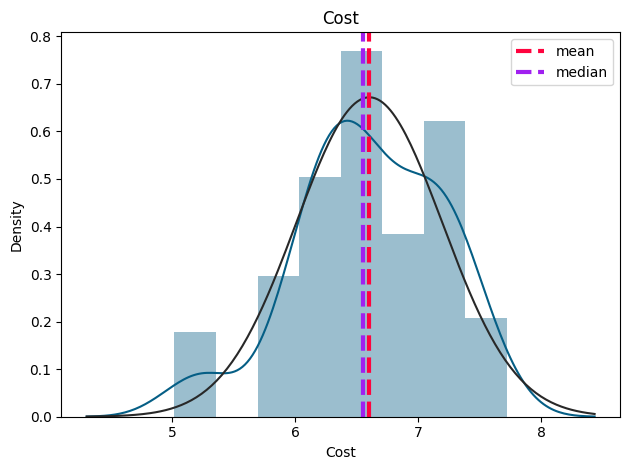

In [197]:
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

### 6. Data Scaling

In [198]:
# Scaling your data

In [199]:
cluster_dummy.sample(5)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
79               Olive Garden  6.55            3.76                    4   
82         Al Saba Restaurant  6.62            3.15                    5   
72                    Labonel  6.91            3.92                    2   
14  AB's - Absolute Barbecues  7.31            4.88                    3   
51  Hitech Bawarchi Food Zone  6.22            3.05                    3   

    American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
79         0       0        0      0    0       0  ...             1      0   
82         0       0        0      0    0       0  ...             1      0   
72         0       0        0      0    0       1  ...             0      0   
14         0       0        0      0    0       0  ...             1      0   
51         0       0        0      0    0       0  ...             1      0   

    Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
79      0        0             0        0            0      0     0      0  
82      0        1             0        0            0      0     0      0  
72      0        0             0        0            0      0     0      0  
14      0        0             0        0            0      0     0      0  
51      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]

In [200]:
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])


##### Which method have you used to scale you data and why?

 I have used standard scaler as those numerical columns where normally distributed.

### 7. Dimesionality Reduction

In [201]:
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])


PCA()

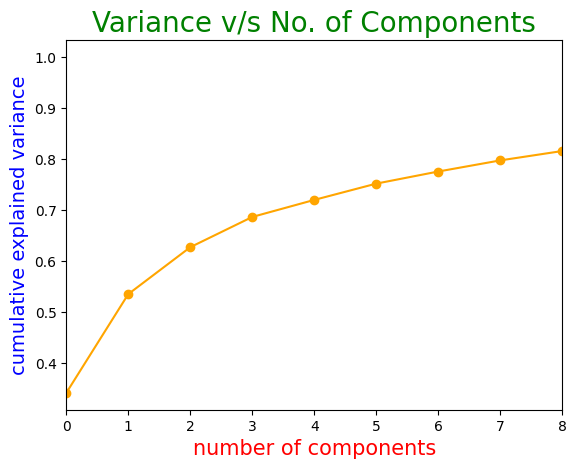

In [202]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()


In [203]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [204]:
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)


original shape:  (100, 47)
transformed shape: (100, 3)


##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases.

In [205]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [206]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [207]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [208]:
sentiment_df.shape

(9961, 6)

In [209]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [210]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (7968, 17327)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 17327)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why?

Answer Here.

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

In [211]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns =
            {'index':'Sentiment','Sentiment':'Count'})


In [212]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]


In [213]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm).

In [214]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

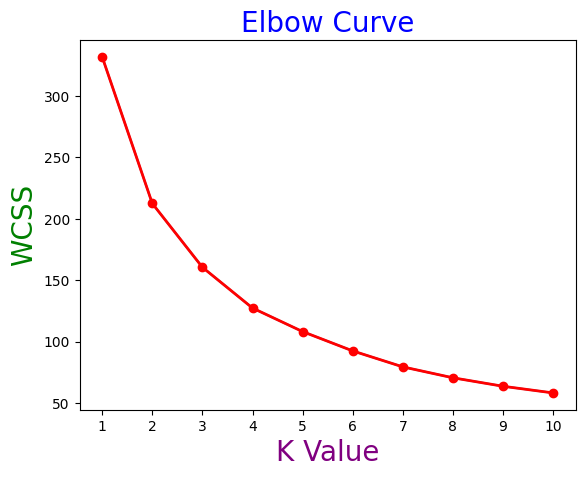

In [215]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans


# Fit the Algorithm
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

     #elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()


# Predict on the model

For n_clusters = 2 average silhouette_score is : 0.31357491715917435
For n_clusters = 3 average silhouette_score is : 0.2974211971806105
For n_clusters = 4 average silhouette_score is : 0.31274400128254354
For n_clusters = 5 average silhouette_score is : 0.30244427842780736
For n_clusters = 6 average silhouette_score is : 0.3167480002610183
For n_clusters = 7 average silhouette_score is : 0.30965474418889105
For n_clusters = 8 average silhouette_score is : 0.29778072472714795
For n_clusters = 9 average silhouette_score is : 0.29957199850588145


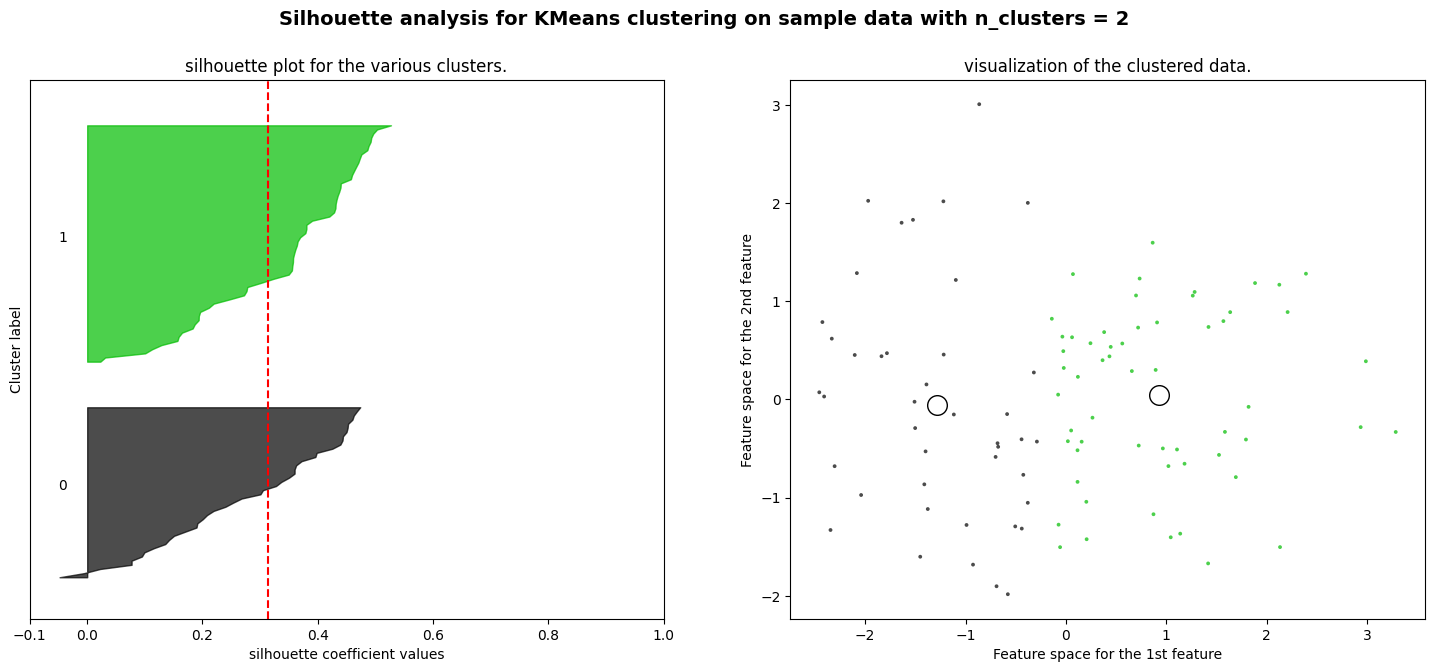

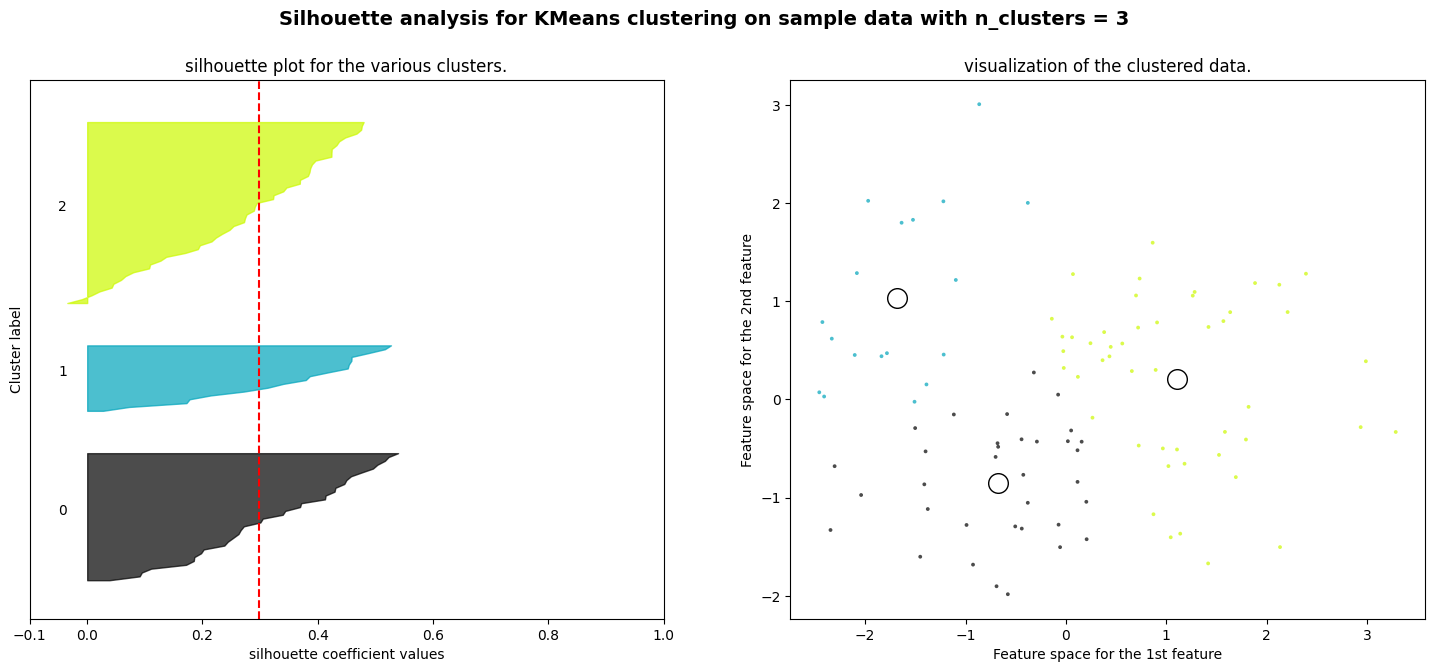

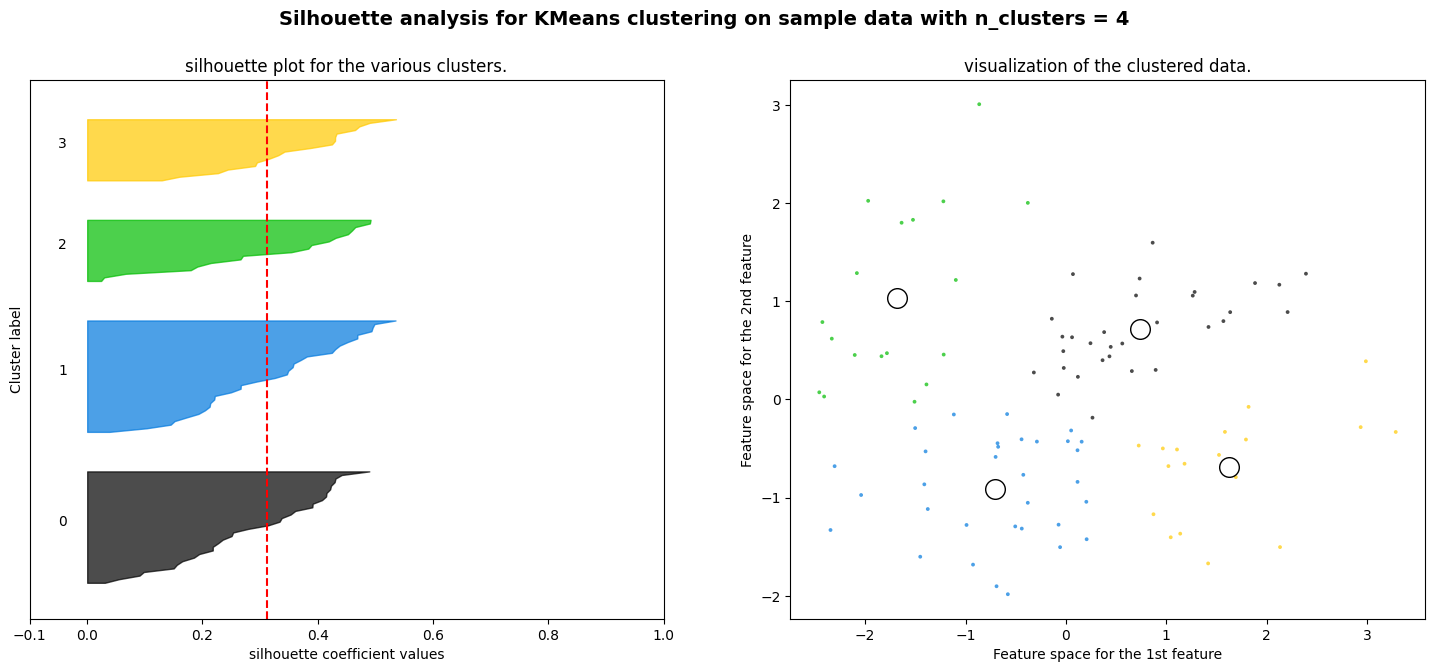

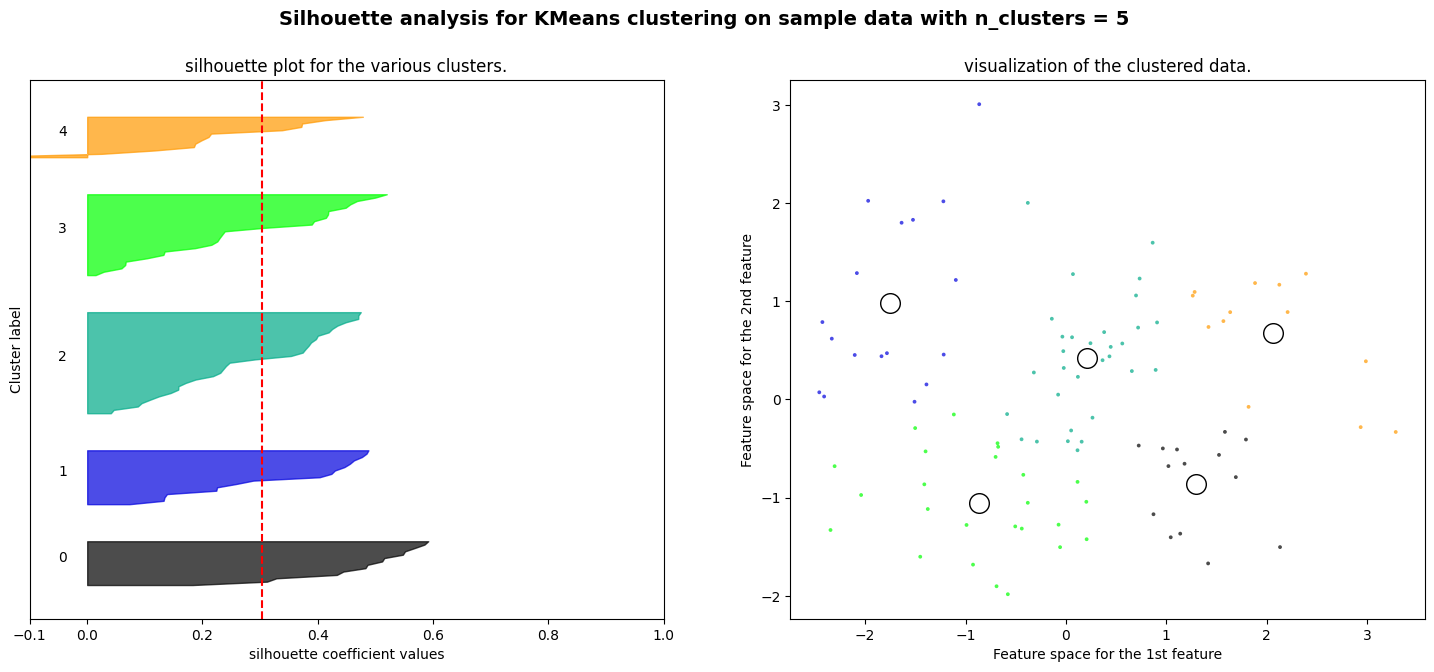

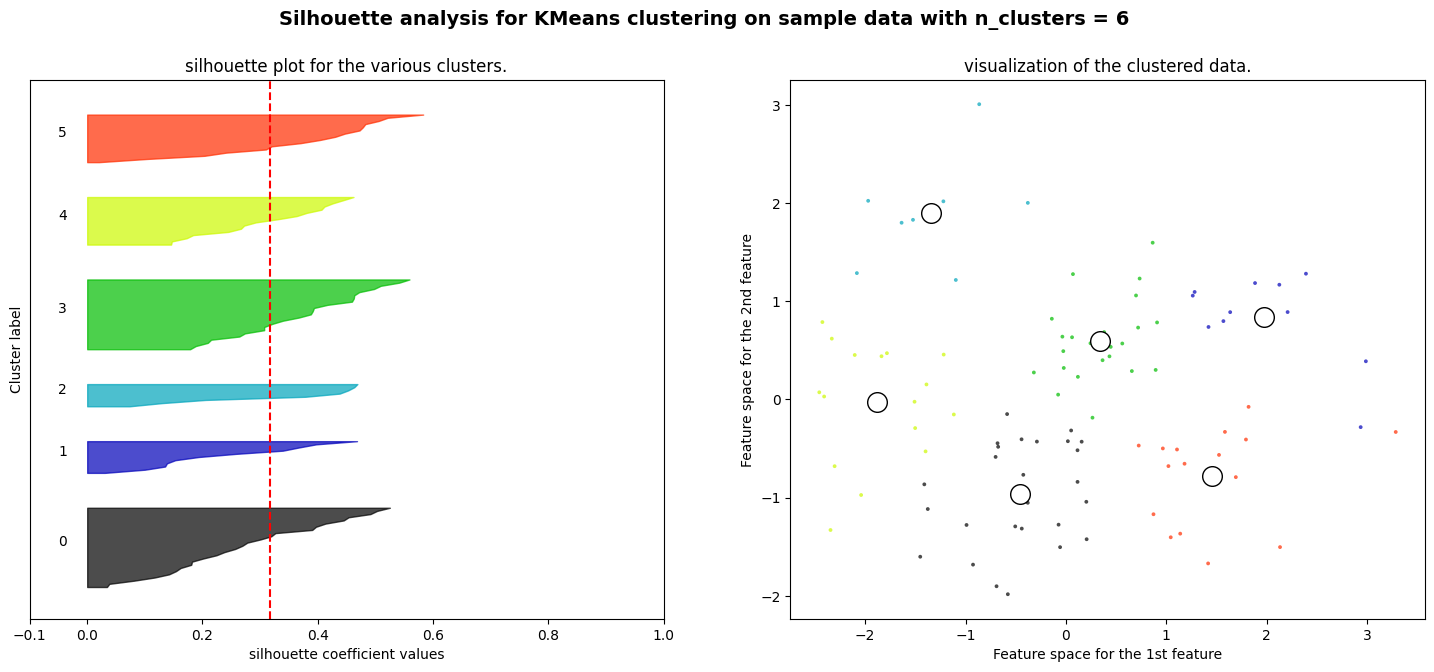

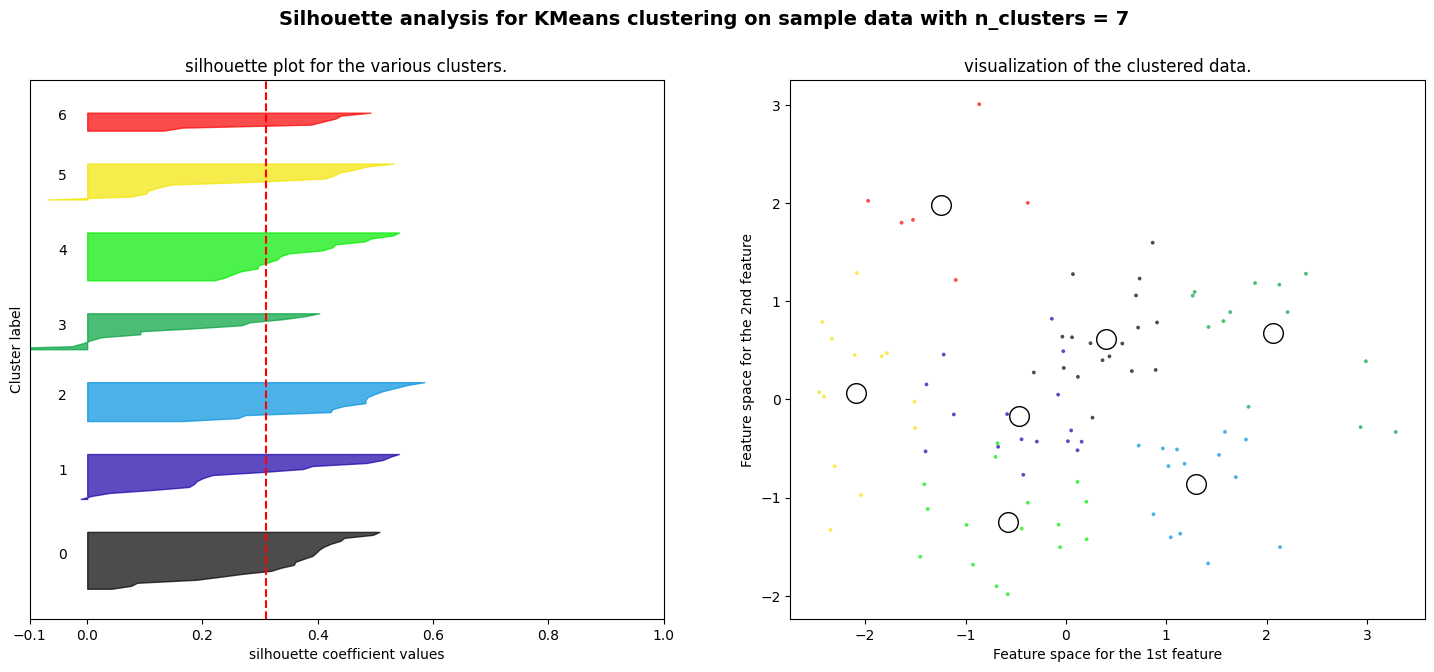

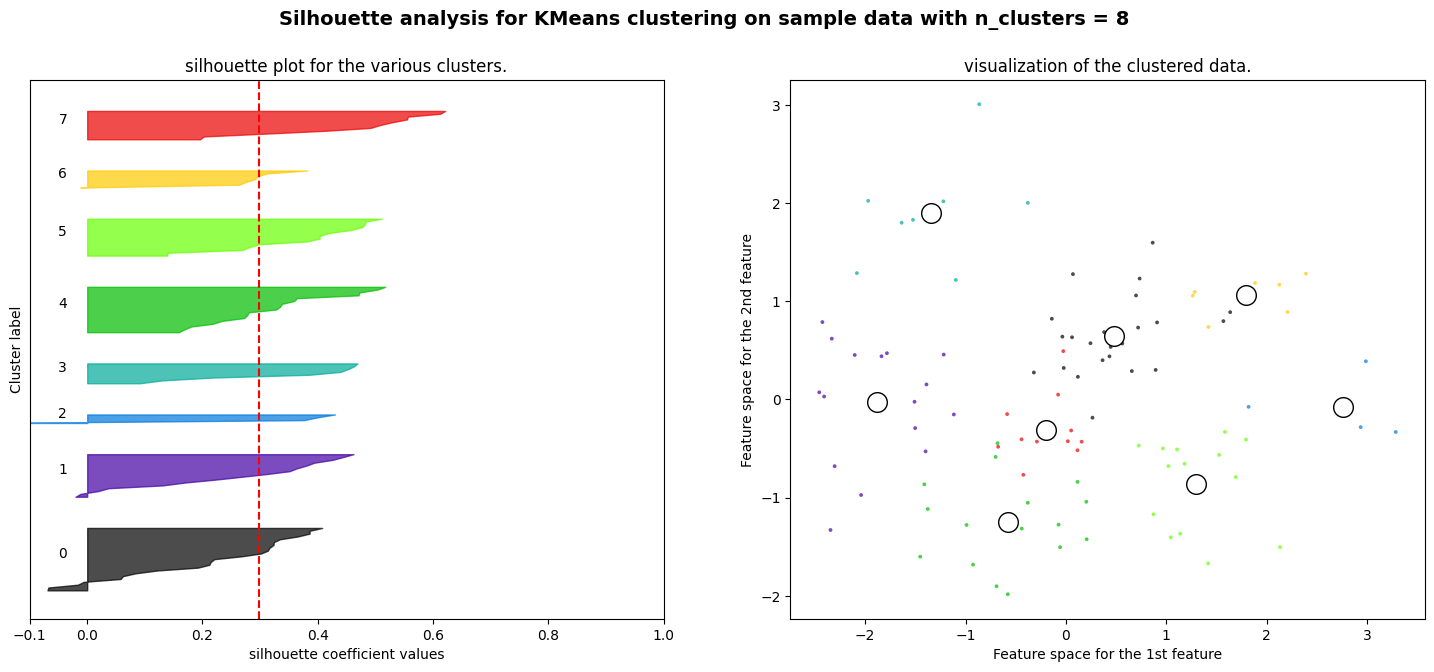

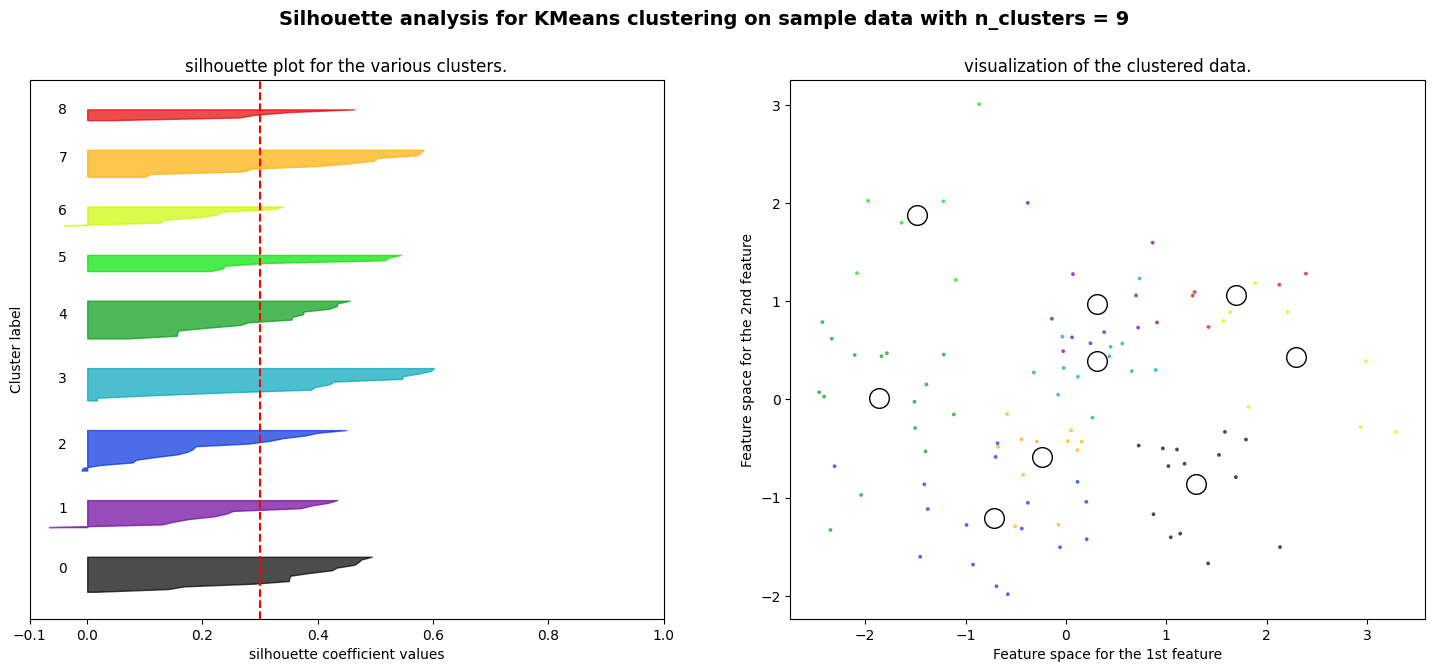

In [216]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

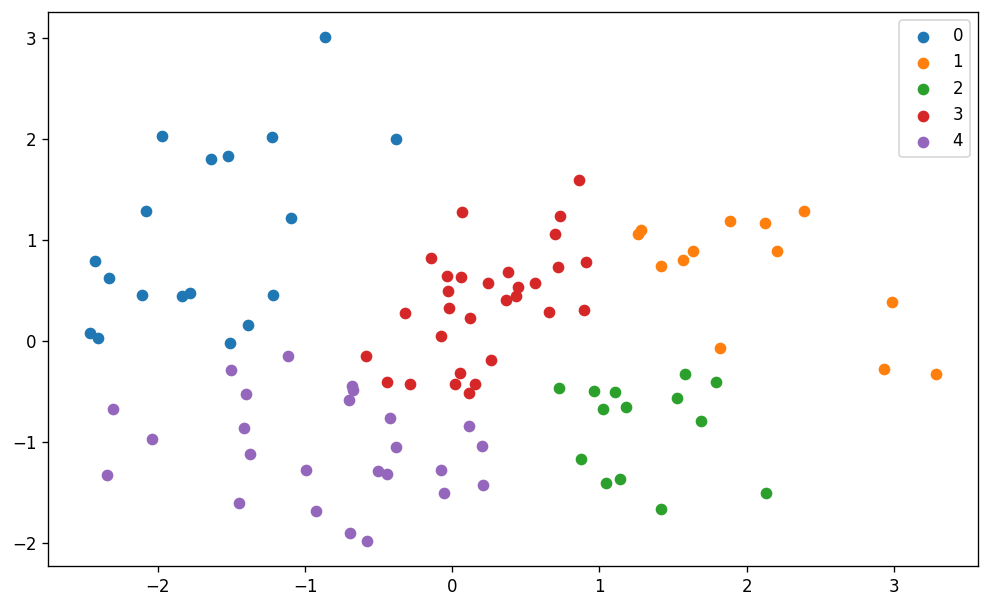

In [217]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [218]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)


PC1   PC2  PC3  label
Restaurant                          
eat.fit       0.20 -1.04 0.41      4
Aromas@11SIX -0.38 -1.05 0.26      4

In [219]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)


Cost  Average_Rating  \
Restaurant                                                                
Jonathan's Kitchen - Holiday Inn Express & Suites  7.55            3.54   
Royal Spicy Restaurant                             6.55            3.74   

                                                   Total_Cuisine_Count  \
Restaurant                                                               
Jonathan's Kitchen - Holiday Inn Express & Suites                    5   
Royal Spicy Restaurant                                               2   

                                                   American  Andhra  Arabian  \
Restaurant                                                                     
Jonathan's Kitchen - Holiday Inn Express & Suites         0       0        0   
Royal Spicy Restaurant                                    0       0        0   

                                                   Asian  BBQ  Bakery  \
Restaurant                                                              
Jonathan's Kitchen - Holiday Inn Express & Suites      0    0       0   
Royal Spicy Restaurant                                 0    0       0   

                                                   Beverages  ...  Pizza  \
Restaurant                                                    ...          
Jonathan's Kitchen - Holiday Inn Express & Suites          0  ...      0   
Royal Spicy Restaurant                                     0  ...      0   

                                                   Salad  Seafood  \
Restaurant                                                          
Jonathan's Kitchen - Holiday Inn Express & Suites      1        0   
Royal Spicy Restaurant                                 0        0   

                                                   South Indian  Spanish  \
Restaurant                                                                 
Jonathan's Kitchen - Holiday Inn Express & Suites             0        0   
Royal Spicy Restaurant                                        1        0   

                                                   Street Food  Sushi  Thai  \
Restaurant                                                                    
Jonathan's Kitchen - Holiday Inn Express & Suites            0      1     0   
Royal Spicy Restaurant                                       0      0     0   

                                                   Wraps  label  
Restaurant                                                       
Jonathan's Kitchen - Holiday Inn Express & Suites      0      4  
Royal Spicy Restaurant                                 0      3  

[2 rows x 48 columns]

In [220]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)


Cost  Average_Rating  \
Restaurant                                                      
Banana Leaf Multicuisine Restaurant    700.00            3.69   
Yum Yum Tree - The Arabian Food Court 1200.00            3.56   

                                       Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                     
Banana Leaf Multicuisine Restaurant                      5         0       1   
Yum Yum Tree - The Arabian Food Court                    2         0       0   

                                       Arabian  Asian  BBQ  Bakery  Beverages  \
Restaurant                                                                      
Banana Leaf Multicuisine Restaurant          0      0    0       0          0   
Yum Yum Tree - The Arabian Food Court        0      0    0       0          0   

                                       ...  Pizza  Salad  Seafood  \
Restaurant                             ...                          
Banana Leaf Multicuisine Restaurant    ...      0      0        0   
Yum Yum Tree - The Arabian Food Court  ...      0      0        0   

                                       South Indian  Spanish  Street Food  \
Restaurant                                                                  
Banana Leaf Multicuisine Restaurant               1        0            0   
Yum Yum Tree - The Arabian Food Court             0        0            0   

                                       Sushi  Thai  Wraps  label  
Restaurant                                                        
Banana Leaf Multicuisine Restaurant        0     0      0      4  
Yum Yum Tree - The Arabian Food Court      0     0      0      3  

[2 rows x 48 columns]

In [221]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = meta[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...  800.00            4.28   
1                     Biryani, North Indian, Chinese  800.00            4.70   
2       Asian, Mediterranean, North Indian, Desserts 1300.00            4.66   
3  Biryani, North Indian, Chinese, Seafood, Bever...  800.00            3.21   
4  Asian, Continental, North Indian, Chinese, Med... 1200.00            4.34   

   Total_Cuisine_Count  label  
0                    6      4  
1                    3      0  
2                    4      0  
3                    5      4  
4                    5      0

In [222]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count


label  Total_Restaurant
4      1                13
3      2                14
2      0                18
1      4                25
0      3                30

In [223]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)


Restaurant      Cuisines    Cost  Average_Rating  \
56  Feast - Sheraton Hyderabad Hotel   Continental 2250.00            4.22   
52                 Biryanis And More  North Indian  500.00            3.74   
78                        Khaan Saab       Mughlai 1100.00            3.80   
31                       Pista House  North Indian 1000.00            3.23   
47                   Shanghai Chef 2    Indonesian  800.00            3.06   

    Total_Cuisine_Count  label  
56                    4      0  
52                    3      3  
78                    2      3  
31                    5      4  
47                    4      4

In [224]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Pizza' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

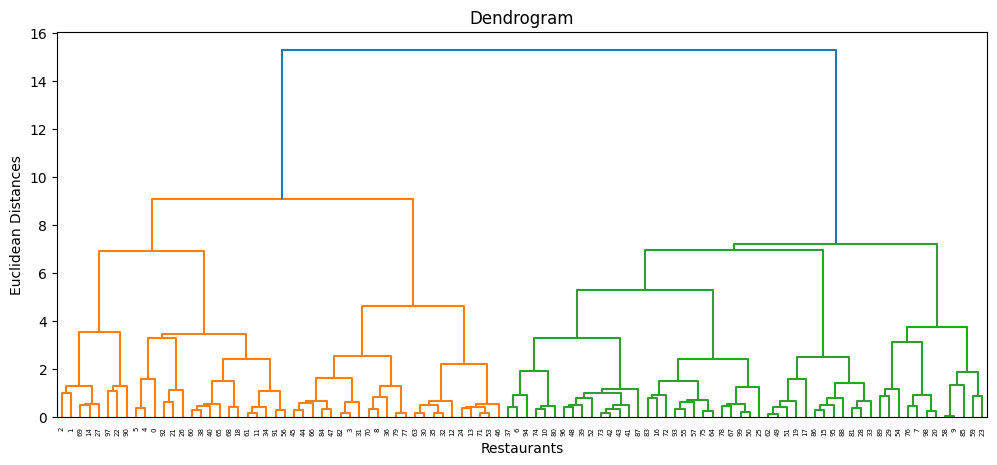

In [225]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()



In [226]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.29566419533238897
For n_clusters = 3, silhouette score is 0.2252839885668055
For n_clusters = 4, silhouette score is 0.20865729675680544
For n_clusters = 5, silhouette score is 0.246652459030282
For n_clusters = 6, silhouette score is 0.27119012773344175
For n_clusters = 7, silhouette score is 0.2686110893537919
For n_clusters = 8, silhouette score is 0.2815077022408657
For n_clusters = 9, silhouette score is 0.288036427814913
For n_clusters = 10, silhouette score is 0.2885450432372219
For n_clusters = 11, silhouette score is 0.29952838233213464
For n_clusters = 12, silhouette score is 0.31428857933967697
For n_clusters = 13, silhouette score is 0.3158360423442036
For n_clusters = 14, silhouette score is 0.3273629599939925
For n_clusters = 15, silhouette score is 0.33655269068108956


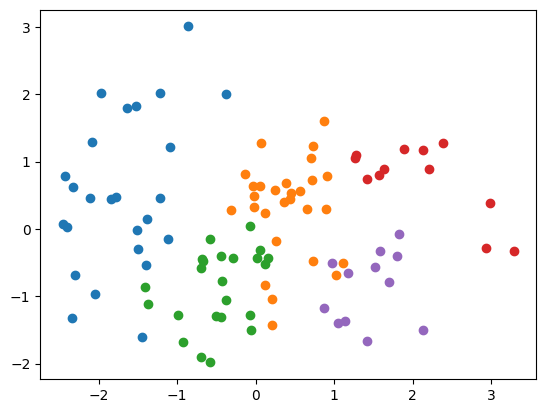

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [227]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))


In [228]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc


In [229]:
clustering_result.sample(5)

Restaurant                                 Cuisines    Cost  \
30         Pot Pourri       Andhra, South Indian, North Indian  900.00   
11    Barbeque Nation  Mediterranean, North Indian, Kebab, BBQ 1600.00   
58           Tempteys                      Desserts, Beverages  350.00   
71  Eat India Company         North Indian, Mughlai, Beverages 1300.00   
20           13 Dhaba                             North Indian  450.00   

    Average_Rating  Total_Cuisine_Count  label  label_hr  
30            3.32                    3      3         2  
11            4.12                    4      0         0  
58            3.85                    2      1         3  
71            3.26                    3      3         2  
20            3.48                    1      1         3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [230]:
# Visualizing evaluation Metric Score chart

K-MEANS
I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels.

AGGLOMERATIVE APPROACH

I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [231]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [232]:
# UNSUPERVISED SENTIMENTAL ANALYSIS

#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


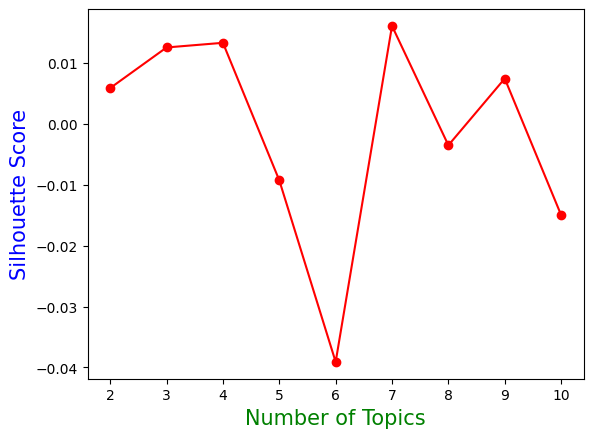

In [233]:

#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()


In [234]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)


LatentDirichletAllocation(n_components=4)

In [235]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97717 sha256=47dea9f796851e92559036d5c23237e2e984d1476365638ce9d32ddd14699041
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [236]:
#using pyldavis to visualise
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


In [237]:

#using pyldavis to visualise
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [238]:
from sklearn.feature_extraction.text import TfidfVectorizer

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [239]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...    5.00   
1  Ambience is too good for a pleasant evening. S...    5.00   
2  A must try.. great food great ambience. Thnx f...    5.00   
3  Soumen das and Arun was a great guy. Only beca...    5.00   
4  Food is good.we ordered Kodi drumsticks and ba...    5.00   

                  Metadata                Time  Pictures  
0   1 Review , 2 Followers 2019-05-25 15:54:00         0  
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0  
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0  
3    1 Review , 1 Follower 2019-05-24 22:11:00         0  
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0

In [240]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant               Reviewer  \
2374                                     Amul  Vinod Kumar Nallavade   
2891                          Behrouz Biryani        Wasim Raja Khan   
7981                             Olive Garden                   John   
9379                 Zing's Northeast Kitchen        Jennie Clarence   
9101  Cascade - Radisson Hyderabad Hitec City             Ron Mendes   

                                                 Review  Rating  \
2374                                   Not yet received    1.00   
2891                                     wonderful test    5.00   
7981                                               good    4.00   
9379  We were soo excited about the place but someho...    3.00   
9101  We are staying in radisson and haveing fud dai...    5.00   

                     Metadata                Time  Pictures  Prediction  
2374                 1 Review 2018-07-27 23:05:00         0           2  
2891    1 Review , 1 Follower 2018-08-21 21:55:00         0           3  
7981    1 Review , 1 Follower 2018-07-13 22:38:00         0           0  
9379  9 Reviews , 7 Followers 2018-12-03 08:56:00         0           0  
9101   1 Review , 6 Followers 2019-05-23 21:33:00         0           2

In [241]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] ==
        sentiment]['Rating'].value_counts())
  print('='*120)


Prediction =  0 

5.00    2332
4.00    1635
1.00     794
3.00     786
2.00     394
4.50      28
3.50      26
2.50      13
1.50       3
Name: Rating, dtype: int64
Prediction =  2 

5.00    1204
1.00     869
4.00     703
3.00     360
2.00     269
4.50      41
3.50      21
1.50       6
2.50       6
Name: Rating, dtype: int64
Prediction =  1 

5.00    114
3.00     13
1.00     13
4.00     10
2.00      2
Name: Rating, dtype: int64
Prediction =  3 

5.00    182
1.00     59
3.00     34
4.00     25
2.00     19
Name: Rating, dtype: int64


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [242]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision],
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [243]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [244]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


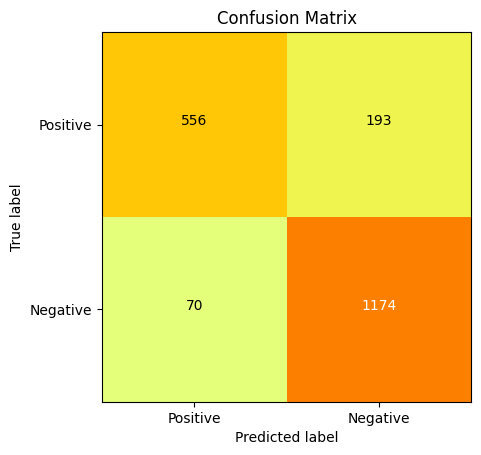

[[ 556  193]
 [  70 1174]]
Metric        Score
---------  --------
ROC AUC    0.843027
Precision  0.858815
Recall     0.94373
F1         0.899272
Accuracy   0.868038


In [245]:
# Visualizing evaluation Metric Score chart
# logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


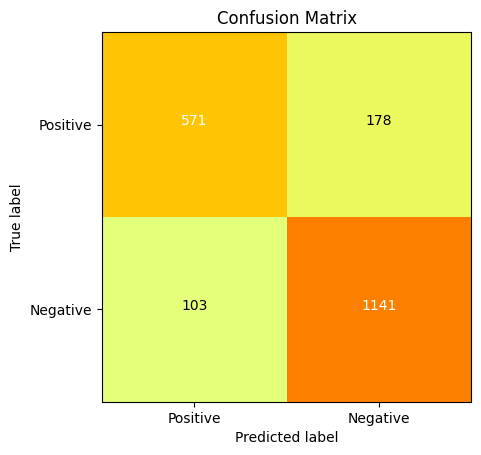

[[ 571  178]
 [ 103 1141]]
Metric        Score
---------  --------
ROC AUC    0.839776
Precision  0.865049
Recall     0.917203
F1         0.890363
Accuracy   0.859007


In [246]:
# XGBOOST
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)


#### 2. Cross- Validation & Hyperparameter Tuning

In [247]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [248]:
#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
clf_grid = GridSearchCV(clf, param_dict,n_jobs=1, cv=5, verbose = 5,scoring='recall')


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


[CV 1/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.984 total time=   0.9s
[CV 2/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.979 total time=   0.8s
[CV 3/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.972 total time=   0.5s
[CV 4/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.983 total time=   0.5s
[CV 5/5] END ..C=0.1, max_iter=1000, penalty=l2;, score=0.978 total time=   0.5s
[CV 1/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ......C=1, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ....C=1, max_iter=1000, penalty=l2;, score=0.944 total time=   0.5s
[CV 2/5] END ....C=1, max_iter=1000, penalty=l2;, score=0.927 total time=   0.4s
[CV 3/5] END ....C=1, max_it

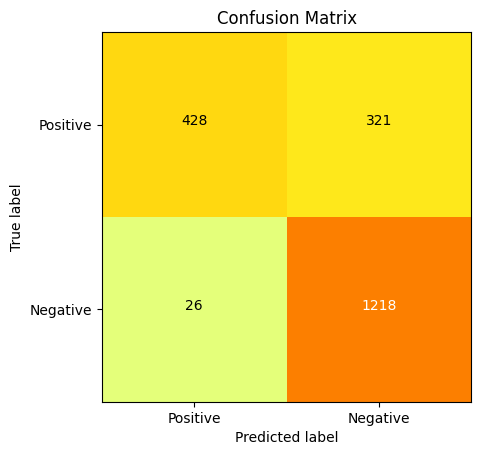

[[ 428  321]
 [  26 1218]]
Metric        Score
---------  --------
ROC AUC    0.775264
Precision  0.791423
Recall     0.9791
F1         0.875314
Accuracy   0.825891


In [249]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

In [250]:
#Xgboost regresser
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = 1)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[08:36:37] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.886 total time=  16.6s
[08:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.898 total time=   7.4s
[08:37:01] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.906 total time=   6.8s
[08:37:07] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 1/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.885 total time=   9.6s
[08:37:17] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 2/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.897 total time=   9.4s
[08:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

[CV 3/3] END criterion=entropy, max_depth=7, n_estimators=125;, score=0.908 total time=   

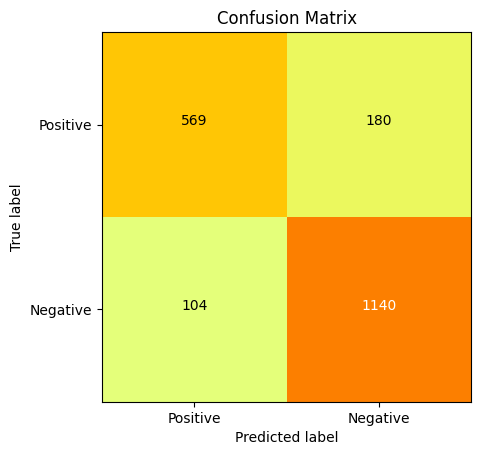

[[ 569  180]
 [ 104 1140]]
Metric        Score
---------  --------
ROC AUC    0.838039
Precision  0.863636
Recall     0.916399
F1         0.889236
Accuracy   0.857501


In [251]:

# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


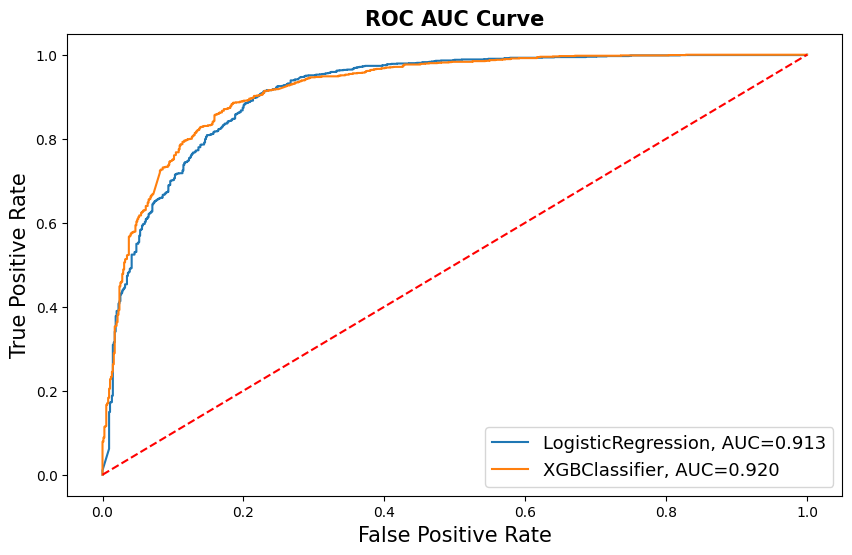

In [252]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

XG Boost classifier

after evaluation

ROC AUC -0.818059
Precision -0.848111
Recall -0.894309
F1 -0.870598
Accuracy -0.835926

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3

In [253]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [254]:
#Content-Based Filtering

#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant  American  Andhra  Arabian  Asian  BBQ  Bakery  Beverages  \
0  Beyond Flavours         0       0        0      0    0       0          0   
1         Paradise         0       0        0      0    0       0          0   

   Biryani  Burger  ...  North Indian  Pizza  Salad  Seafood  South Indian  \
0        0       0  ...             1      0      0        0             1   
1        1       0  ...             1      0      0        0             0   

   Spanish  Street Food  Sushi  Thai  Wraps  
0        0            0      0     0      0  
1        0            0      0     0      0  

[2 rows x 45 columns]

In [255]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [256]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours    5.00
1  Anusha Tirumalaneedi  Beyond Flavours    5.00
2       Ashok Shekhawat  Beyond Flavours    5.00
3        Swapnil Sarkar  Beyond Flavours    5.00
4                Dileep  Beyond Flavours    5.00

In [257]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reviewer  \
0                    #FOODPORN   
1          #chloesviews // CAH   
2                         $ign   
3                     4mybanti   
4  @FuloriBinaChutneyKaiseBani   

                                    Rated_Restaurant  
0  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...  
1         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]  
2           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]  
3      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]  
4  [{'Restaurant': 'Chinese Pavilion', 'Rating': ...

In [258]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))),
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [259]:
#getting output
user_preference_vector.sample(5)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant            Reviewer  Beyond Flavours  Paradise  Flechazo  \
7340           Yada Roopavathi             0.00      0.00      0.00   
2330            Jayant Shekhar             0.00      0.00      0.00   
3307               Mohit Anand             0.00      0.00      0.00   
858                Arpit Sahai             0.00      0.00      0.00   
1001        Atei Jenny Uo Chon             0.00      0.00      0.00   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
7340                                  0.00                        0.00   
2330                                  0.00                        0.00   
3307                                  0.00                        0.00   
858                                   0.00                        0.00   
1001                                  0.00                        0.00   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
7340                         0.00     0.00                      0.00   
2330                         0.00     0.00                      0.00   
3307                         0.00     0.00                      0.00   
858                          0.00     0.00                      0.00   
1001                         0.00     0.00                      0.00   

Restaurant  Hyper Local  ...  Arena Eleven  \
7340               0.00  ...          0.00   
2330               0.00  ...          0.00   
3307               0.00  ...          0.00   
858                0.00  ...          0.00   
1001               0.00  ...          0.00   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
7340                                           0.00   
2330                                           0.00   
3307                                           0.00   
858                                            0.00   
1001                                           0.00   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
7340                                        0.00                      0.00   
2330                                        0.00                      0.00   
3307                                        0.00                      0.00   
858                                         0.00                      5.00   
1001                                        0.00                      3.00   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
7340                  0.00        0.00               0.00   
2330                  0.00        0.00               0.00   
3307                  0.00        0.00               0.00   
858                   0.00        0.00               0.00   
1001                  0.00        0.00               0.00   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
7340                                   0.00      0.00              0.00  
2330                                   0.00      0.00              0.00  
3307                                   0.00      0.00              0.00  
858                                    0.00      0.00              0.00  
1001                                   0.00      0.00              0.00  

[5 rows x 101 columns]

In [260]:
#using dot multiplication to find score or weight for each reviewer
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [261]:
#getting output
result_df[:5]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reviewer American Andhra Arabian Asian  BBQ Bakery  \
0                    #FOODPORN     0.00   0.00    0.00  5.00 0.00   0.00   
1          #chloesviews // CAH     0.00   0.00    0.00  0.00 0.00   0.00   
2                         $ign     0.00   0.00    0.00  0.00 0.00   0.00   
3                     4mybanti     0.00   2.00    0.00  0.00 0.00   0.00   
4  @FuloriBinaChutneyKaiseBani     0.00   0.00    0.00  0.00 0.00   0.00   

  Beverages Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0      0.00    0.00   0.00  ...         0.00  0.00  0.00    0.00         0.00   
1      0.00    0.00   0.00  ...         5.00  0.00  0.00    0.00         5.00   
2      0.00    0.00   0.00  ...         4.00  0.00  0.00    0.00         0.00   
3      0.00    0.00   0.00  ...         2.00  0.00  0.00    0.00         0.00   
4      0.00    0.00   0.00  ...         0.00  0.00  0.00    5.00         0.00   

  Spanish Street Food Sushi Thai Wraps  
0    0.00        0.00  5.00 0.00  0.00  
1    0.00        0.00  0.00 0.00  0.00  
2    0.00        0.00  0.00 0.00  0.00  
3    0.00        0.00  0.00 0.00  0.00  
4    0.00        0.00  0.00 0.00  0.00  

[5 rows x 45 columns]

In [262]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reviewer                                   Rated_Restaurant  \
655         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
3858   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2654         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
2313     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   
7013  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   

      Rated_Restaurant_Count  
655                       13  
3858                      13  
2654                      12  
2313                      11  
7013                      11

In [263]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [264]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
655   Ankita    12.00  12.00    0.00  0.00 0.00   4.00      0.00    8.00   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
655   0.00  ...        36.00  0.00  4.00    0.00        13.00    0.00   

    Street Food Sushi Thai Wraps  
655        0.00  4.00 0.00  4.00  

[1 rows x 45 columns]

In [265]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [266]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [267]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [268]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [269]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [270]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


70.0

In [271]:
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [272]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values
         # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values

        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])

    return users, restaurant, scores


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [273]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


User                            Restaurant  Score
0          Ankita                       Beyond Flavours  91.00
1          Ankita                              Paradise  70.00
2          Ankita                              Flechazo  44.00
3          Ankita        Shah Ghouse Hotel & Restaurant  70.00
4          Ankita            Over The Moon Brew Company  74.00
...           ...                                   ...    ...
28336  Simi Reddy                              Delhi-39  10.00
28337  Simi Reddy                    Al Saba Restaurant  15.00
28338  Simi Reddy                               T Grill  20.00
28339  Simi Reddy  Collage - Hyatt Hyderabad Gachibowli  14.00
28340  Simi Reddy                            Desi Bytes  10.00

[28341 rows x 3 columns]

In [274]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant  User
19  Collage - Hyatt Hyderabad Gachibowli   691
57            Over The Moon Brew Company   672
13                       Beyond Flavours   667
63                            PourHouse7   667
56                          Olive Garden   638

In [275]:
#least recommended restaurant
recom_rest[-5:]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant  User
84       Zing's Northeast Kitchen    11
9                          B-Dubs     5
78  The Old Madras Baking Company     2
52            Mohammedia Shawarma     2
53                  Momos Delight     1

In [276]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

In [277]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


User                             Recommended_Restaurant  \
59    Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
301          Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
425          Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
734     Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
51          Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
33    Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
763        Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
395  Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
382   Moonis Ahmed  [{'Restaurant': 'Beyond Flavours', 'Score': 28...   
867   Vedant Killa  [{'Restaurant': 'Beyond Flavours', 'Score': 34...   

     Total_Recommendation  
59                     72  
301                    71  
425                    71  
734                    69  
51                     69  
33                     69  
763                    68  
395                    68  
382                    67  
867                    67

In [278]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant  Score
0                        Beyond Flavours  91.00
31                           Owm Nom Nom  82.00
56                          Olive Garden  82.00
64  Collage - Hyatt Hyderabad Gachibowli  82.00
40                            PourHouse7  82.00
..                                   ...    ...
60                                  GD's  12.00
51                               Labonel  12.00
65                        Dunkin' Donuts  12.00
29                          Karachi Cafe  12.00
16                            Tiki Shack  12.00

[69 rows x 2 columns]

In [279]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df.sample(5)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


doc_index                                             doc_id  \
204433       9022                                       Arena Eleven   
52269        2197  Jonathan's Kitchen - Holiday Inn Express & Suites   
208161       9145            Cascade - Radisson Hyderabad Hitec City   
115908       4967                                      Mathura Vilas   
34184        1413                          AB's - Absolute Barbecues   

             token  bow  
204433     rajiala    1  
52269       makani    1  
208161        food    3  
115908  everything    1  
34184           ab    1

In [280]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


doc_id     token  bow
0  Beyond Flavours      also    1
1  Beyond Flavours  ambience    1
2  Beyond Flavours    brunch    1
3  Beyond Flavours     chill    1
4  Beyond Flavours      cost    1

In [281]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Restaurant  \
8630                   The Chocolate Room   
3394                           Club Rogue   
3651  Banana Leaf Multicuisine Restaurant   
2481                                SKYHY   
2868                      Behrouz Biryani   

                                                 Review  
8630  [absolutely, love, place, best, place, visit, ...  
3394  [great, ambiencedj, superbfood, service, goodp...  
3651  [good, quality, tasty, food, good, variety, re...  
2481  [bad, management, cheat, firstly, denied, flat...  
2868  [ordered, food, confirmed, restaurant, mint, w...

In [282]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


doc_id    token  bow
125518  Asian Meal Box     also    1
125519  Asian Meal Box     good    2
125520  Asian Meal Box  overall    1
125521  Asian Meal Box    spicy    2
125522  Asian Meal Box     even    1
125523  Asian Meal Box    taste    1
125524  Asian Meal Box   option    1
125525  Asian Meal Box     much    1
125526  Asian Meal Box     soft    1
125527  Asian Meal Box   noodle    1

In [283]:
#converting bow to horizontal format using pivot
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'],
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

In [284]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = base.append(compare)
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [285]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [286]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


doc_id     type  absent  absolutely  accessible  across  action  \
0     Asian Meal Box     base    1.00        3.00        0.00    1.00    1.00   
1  Biryanis And More  compare    0.00        3.00        1.00    1.00    0.00   

   actual  actually  add  ...   👌🏻   👍🏻  😀😀😀😀😀😀😀😀    😂  😂the    😃    😍   😍😍  \
0    0.00      1.00 1.00  ... 0.00 0.00      0.00 0.00  0.00 1.00 0.00 0.00   
1    1.00      1.00 1.00  ... 1.00 1.00      1.00 1.00  1.00 0.00 4.00 1.00   

     😕  😪😪😪😪  
0 0.00  0.00  
1 1.00  1.00  

[2 rows x 1334 columns]

In [287]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.5338412612763059

In [288]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [289]:
df_similarities

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Beyond Flavours Paradise Flechazo  \
Beyond Flavours                               1     0.82     0.84   
Paradise                                   0.82        1     0.75   
Flechazo                                   0.84     0.75        1   
Shah Ghouse Hotel & Restaurant             0.61     0.65     0.52   
Over The Moon Brew Company                 0.82     0.71     0.79   
...                                         ...      ...      ...   
Desi Bytes                                 0.68     0.64     0.59   
Hyderabadi Daawat                          0.68     0.63     0.62   
Zega - Sheraton Hyderabad Hotel            0.82     0.67     0.78   
Triptify                                   0.53     0.46     0.44   
Chinese Pavilion                           0.73     0.63     0.67   

                                Shah Ghouse Hotel & Restaurant  \
Beyond Flavours                                           0.61   
Paradise                                                  0.65   
Flechazo                                                  0.52   
Shah Ghouse Hotel & Restaurant                               1   
Over The Moon Brew Company                                0.54   
...                                                        ...   
Desi Bytes                                                0.60   
Hyderabadi Daawat                                         0.75   
Zega - Sheraton Hyderabad Hotel                           0.58   
Triptify                                                  0.48   
Chinese Pavilion                                          0.59   

                                Over The Moon Brew Company  \
Beyond Flavours                                       0.82   
Paradise                                              0.71   
Flechazo                                              0.79   
Shah Ghouse Hotel & Restaurant                        0.54   
Over The Moon Brew Company                               1   
...                                                    ...   
Desi Bytes                                            0.61   
Hyderabadi Daawat                                     0.62   
Zega - Sheraton Hyderabad Hotel                       0.83   
Triptify                                              0.47   
Chinese Pavilion                                      0.68   

                                The Fisherman's Wharf eat.fit  \
Beyond Flavours                                  0.82    0.65   
Paradise                                         0.65    0.55   
Flechazo                                         0.78    0.51   
Shah Ghouse Hotel & Restaurant                   0.58    0.65   
Over The Moon Brew Company                       0.82    0.53   
...                                               ...     ...   
Desi Bytes                                       0.63    0.67   
Hyderabadi Daawat                                0.69    0.64   
Zega - Sheraton Hyderabad Hotel                  0.86    0.59   
Triptify                                         0.49    0.61   
Chinese Pavilion                                 0.74    0.63   

                                Shah Ghouse Spl Shawarma Hyper Local  \
Beyond Flavours                                     0.40        0.83   
Paradise                                            0.38        0.71   
Flechazo                                            0.37        0.77   
Shah Ghouse Hotel & Restaurant                      0.53        0.61   
Over The Moon Brew Company                          0.42        0.82   
...                                                  ...         ...   
Desi Bytes                                          0.44        0.67   
Hyderabadi Daawat                                   0.48        0.69   
Zega - Sheraton Hyderabad Hotel                     0.42        0.82   
Triptify                                            0.40        0.53   
Chinese Pavilion                                    0.45        0.72   

                   

In [290]:
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [291]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [292]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")


Restaurant 1's index is 16 and Restaurant 2's index is 67


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [293]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.6043971333550248

In [294]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]

                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [295]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [296]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [297]:
#getting the output
res_sim_df.sample(10)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


USER                                         RESTAURANT  \
23754       Kamal Prakash                                  Eat India Company   
8104       Anupam Agarwal                                        Pista House   
35623          Neha Singh                               Marsala Food Company   
13336     Sugandha Saxena                             Mustang Terrace Lounge   
41565     Diplekha Sarkar                                       Karachi Cafe   
65121  Saikrishna Pothuri                                    Hyderabad Chefs   
59067               Priti                                     Udipi's Upahar   
18034       Rahul Jaiswal                                       Being Hungry   
213                 Kiran  Jonathan's Kitchen - Holiday Inn Express & Suites   
6223      Yum Yum YUMMY !                                              SKYHY   

       SCORE  
23754   0.76  
8104    0.82  
35623   0.89  
13336   0.71  
41565   0.77  
65121   0.65  
59067   0.67  
18034   0.60  
213     0.73  
6223    0.69

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [298]:
# Visualizing evaluation Metric Score chart

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Content-based filtering is a technique used in recommendation systems to recommend items to users based on their past preferences or interactions with items. It works by analyzing the attributes of the items and user preferences, and recommending items that have similar attributes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [299]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

The specific evaluation metric to use will depend on the specific use case and the relative costs of false positives and false negatives. For a positive business impact, F1-score can be considered as it balances the precision and recall to give an overall performance measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

XGBoost's gradient-boosted decision trees algorithm can be highly effective in sentiment analysis as it can learn complex relationships between features and sentiment labels.

XGBoost's ensemble nature, regularization, speed, feature selection, and gradient-boosted decision tree algorithm make it a powerful tool for sentiment analysis.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [300]:
#Get shap values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


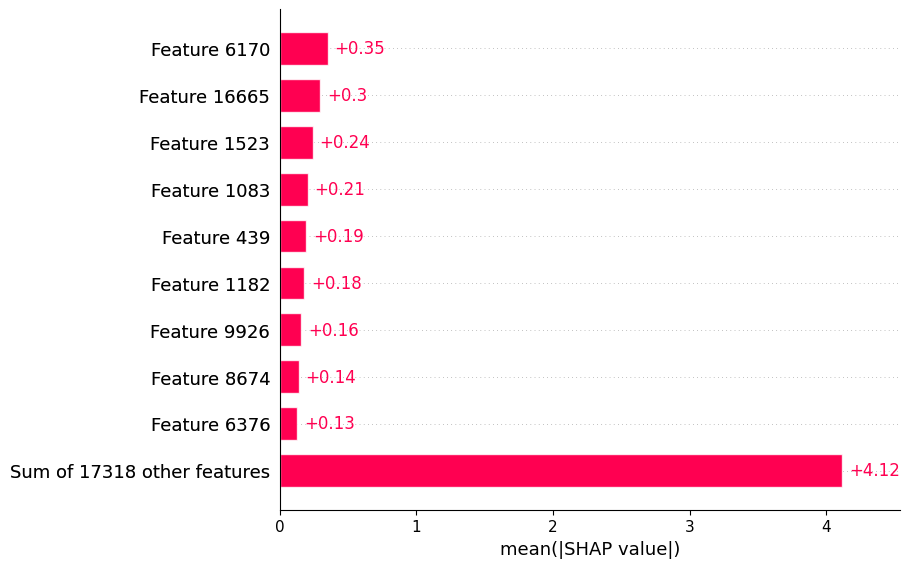

In [302]:
#Mean SHAP
shap.plots.bar(shap_values)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


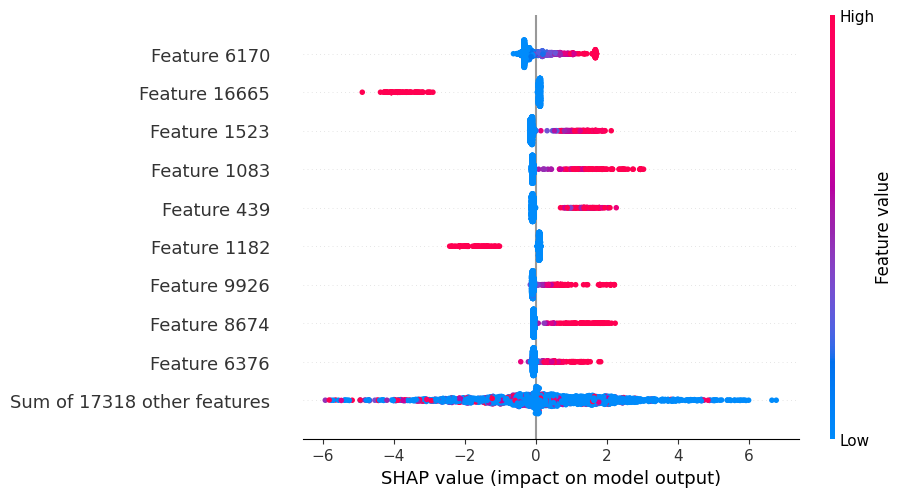

In [304]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Answer Here.

There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [305]:
# Save the File

import pickle
import os

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [306]:
with open ('model_pickle','wb') as f:
  pickle.dump(xgb,f)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [307]:
# Load the File and predict unseen data.
with open ('model_pickle','rb') as f:
  xgb_model = pickle.load(f)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved.

restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***